In [1]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [2]:
%%html
<div id="toc"></div>

In [3]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [4]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [5]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [6]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [7]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [8]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [9]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Mon Nov 16 11:20:26 2020 +0100**

In [10]:
plt.rcParams['figure.figsize'] = [20, 7]

In [11]:
import matplotlib.ticker as ticker

def beautify_graph(ax):
    plt.rcParams['figure.figsize'] = [20, 12]
    plt.xticks(rotation=90)
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='both', length=14)
    #ax.locator_params(axis='x', nbins=10)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=60))
    
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [12]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [13]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [14]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
15-Nov-20        33977           24055     9376       546          765   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
15-Nov-20         649           116          23290          24055   195275   

           CASI PER TAMPONE (%)  
                                 
15-Nov-20                  17.4

### I dati cumulati di oggi

In [15]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
15-Nov-20      1178529         712490   420810     45229        35469   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
15-Nov-20       32047          3422         677021  18878386

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

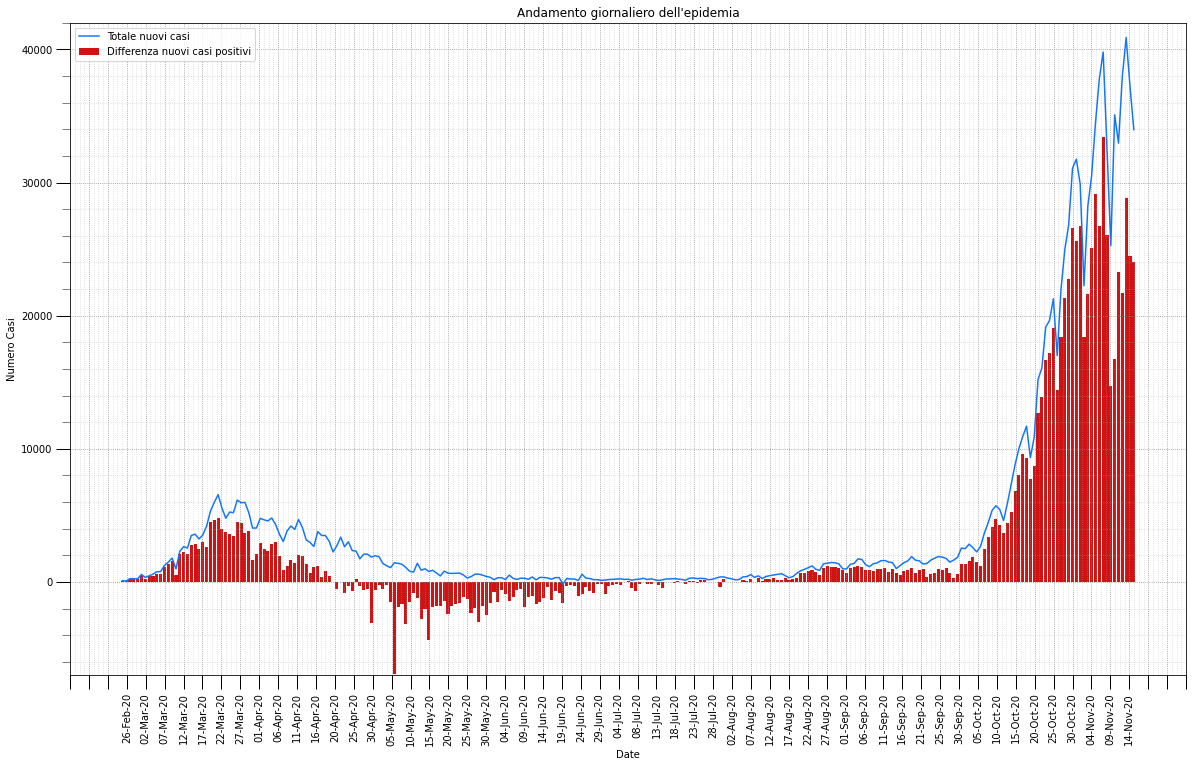

In [55]:
date = incremental_data['data'].to_numpy()
total_cases = incremental_data['totale_casi'].to_numpy()
new_positives = incremental_data['nuovi_attualmente_positivi'].to_numpy()

fig, ax = plt.subplots()

colors = COL_TOTALE_CASI
legends = "Totale nuovi casi"
ax.plot(date, total_cases,color=colors, label=legends)

colors = COL_DIFF_POSITIVI
legends = "Differenza nuovi casi positivi"
ax.bar(date, new_positives, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")

ax.set_ylim(-7000,42000)

beautify_graph(ax)


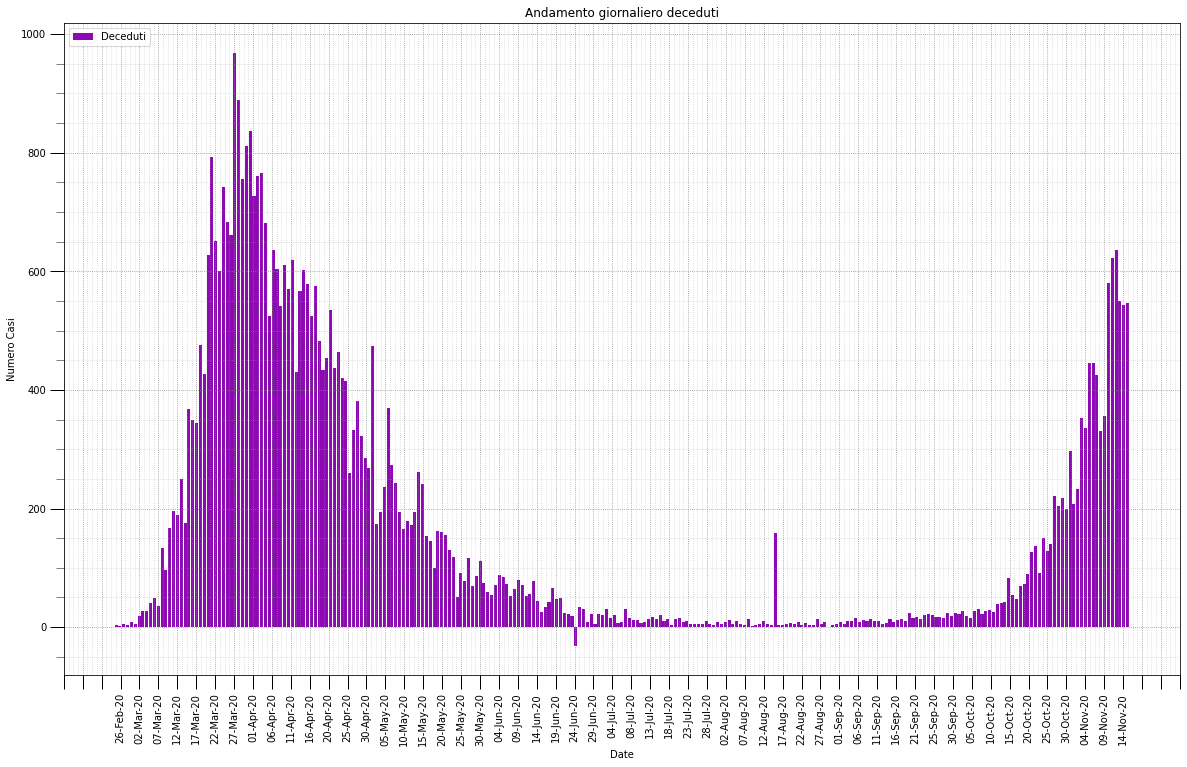

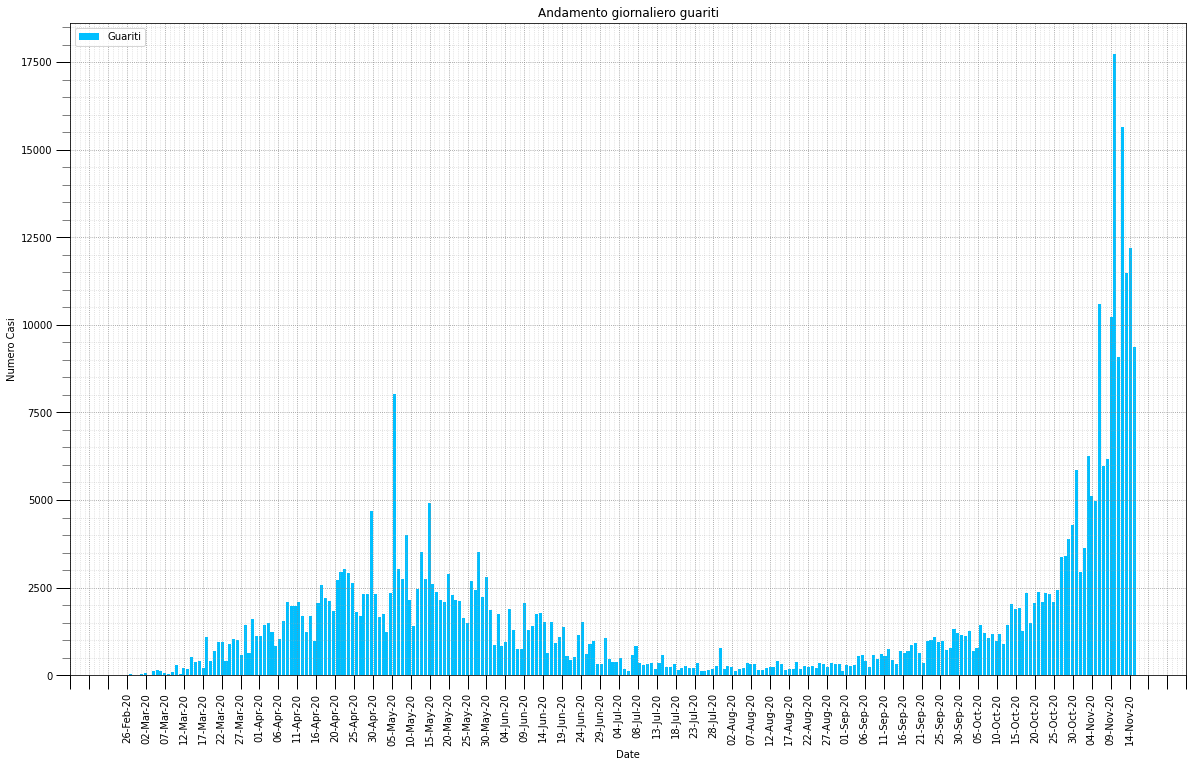

In [17]:
date = incremental_data['data'].to_numpy()
died = incremental_data['deceduti'].to_numpy()
recovered = incremental_data['dimessi_guariti'].to_numpy()

fig, ax = plt.subplots()
colors = COL_DECEDUTI
legends = "Deceduti"
ax.bar(date, died,color=colors, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero deceduti")
beautify_graph(ax)

fig, ax = plt.subplots()
colors = COL_GUARITI
legends = "Guariti"
ax.bar(date, recovered, color=colors,  label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero guariti")
beautify_graph(ax)


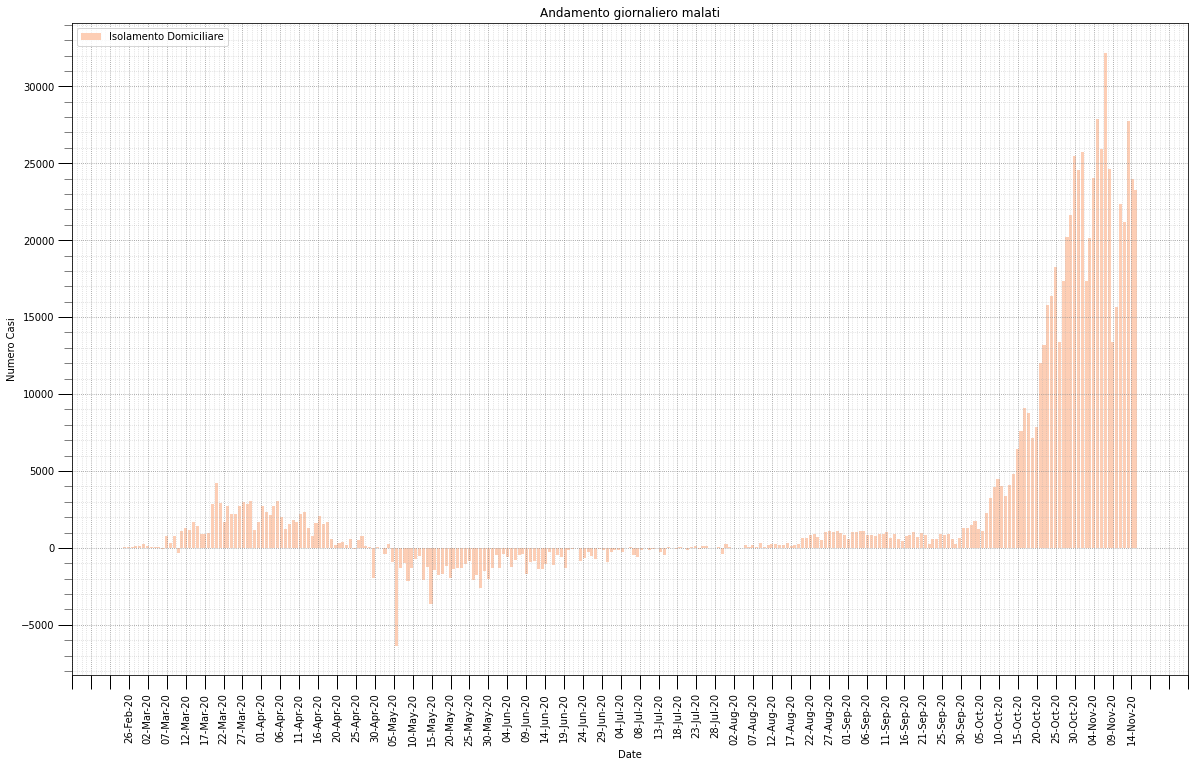

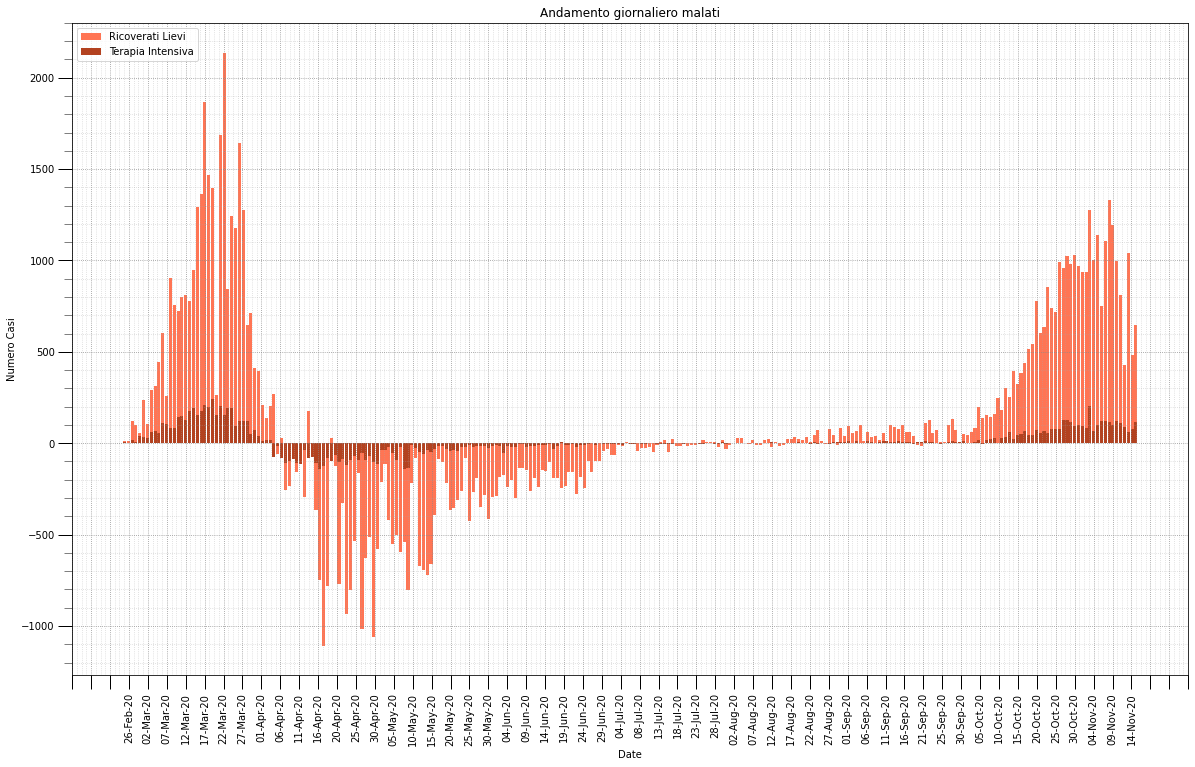

In [18]:
hospidalized =incremental_data['ricoverati_con_sintomi'].to_numpy()
intensive =incremental_data['terapia_intensiva'].to_numpy()
home =incremental_data['isolamento_domiciliare'].to_numpy()


fig, ax = plt.subplots()

colors = COL_ISOLAMENTO_DOMICILIARE
legends = "Isolamento Domiciliare"
ax.bar(date, home, color=colors,  label=legends)

ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")

beautify_graph(ax)

fig, ax = plt.subplots()


colors = COL_RICOVERATI
legends = "Ricoverati Lievi"
ax.bar(date, hospidalized, color=colors,  label=legends)

colors = COL_TERAPIA_INTENSIVA
legends = "Terapia Intensiva"
ax.bar(date, intensive, color=colors,  label=legends)


ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero malati")
beautify_graph(ax)


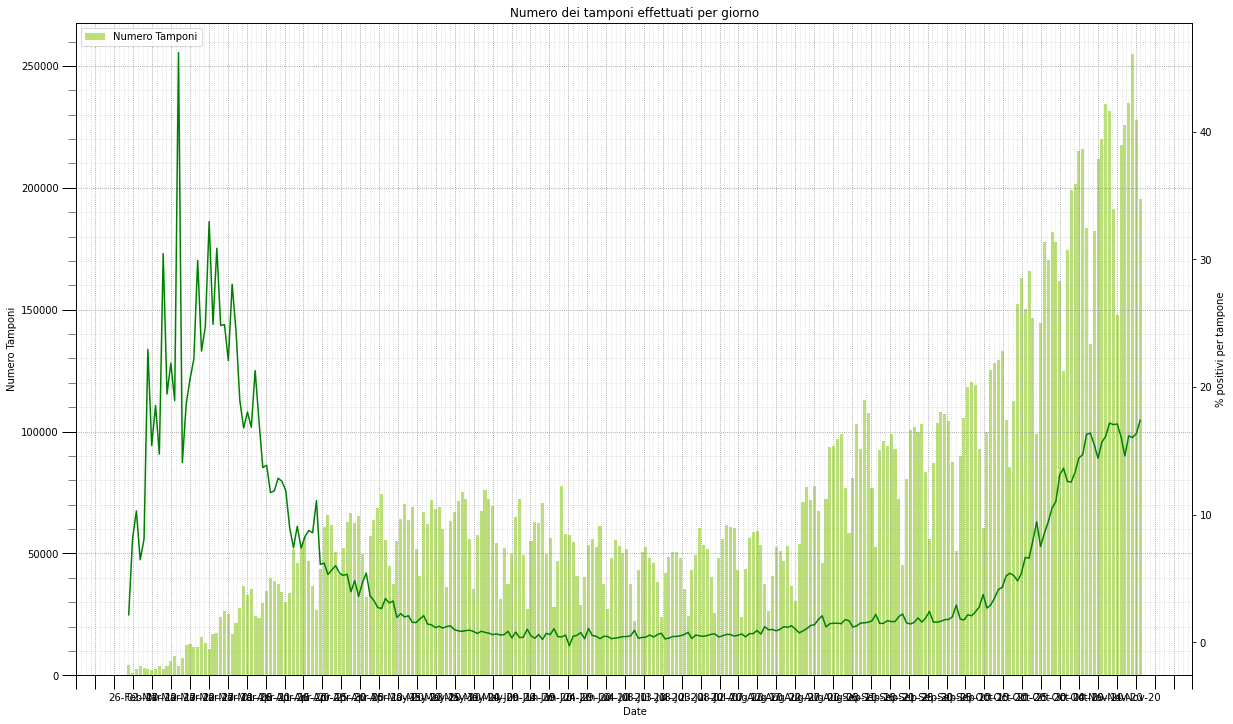

In [19]:
swabs =incremental_data['tamponi'].to_numpy()
swabs_percent =incremental_data['CASI PER TAMPONE (%)'].to_numpy()


fig, ax = plt.subplots()

colors = COL_TAMPONI
legends = "Numero Tamponi"
ax.bar(date, swabs, color=colors,  label=legends)

ax2 = ax.twinx() 
colors = COL_AVG
legends = "% Positivi per Tampone"
ax2.plot(date, swabs_percent, color=colors,  label=legends)

ax.set_ylabel('Numero Tamponi')
ax2.set_ylabel('% positivi per tampone')
ax2.axes.get_xaxis().set_visible(False)
ax.set_title("Numero dei tamponi effettuati per giorno")

beautify_graph(ax)

#### I dati incrementali degli ultimi 10 giorni

In [20]:

show_table(incremental_data.rename(columns=NAME_LABELS),15).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
01-Nov-20        29905           26743     2954       208         1032   
02-Nov-20        22253           18383     3637       233         1021   
03-Nov-20        28241           21630     6258       353         1477   
04-Nov-20        30548           25093     5103       335         1069   
05-Nov-20        34502           29113     4961       445         1239   
06-Nov-20        37802           26770    10586       446          873   
07-Nov-20        39809           33418     5966       425         1223   
08-Nov-20        32614           26100     6183       331         1446   
09-Nov-20        25269           14698    10215       356         1296   
10-Nov-20        35090           16776    17734       580         1119   
11-Nov-20        32961           23248     9090       623          921   
12-Nov-20        37977           21696    15645       636          518   
13-Nov-20        40902           28872    11480       550         1101   
14-Nov-20        37249           24509    12196       544          560   
15-Nov-20        33977           24055     9376       546          765   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
01-Nov-20         936            96          25711   183457   
02-Nov-20         938            83          17362   135731   
03-Nov-20        1274           203          20153   182287   
04-Nov-20        1002            67          24024   211831   
05-Nov-20        1140            99          27874   219884   
06-Nov-20         749           124          25897   234245   
07-Nov-20        1104           119          32195   231673   
08-Nov-20        1331           115          24654   191144   
09-Nov-20        1196           100          13402   147725   
10-Nov-20         997           122          15657   217758   
11-Nov-20         811           110          22327   225640   
12-Nov-20         429            89          21178   234672   
13-Nov-20        1041            60          27771   254908   
14-Nov-20         484            76          23949   227695   
15-Nov-20         649           116          23290   195275   

           CASI PER TAMPONE (%)  
                                 
01-Nov-20                 16.30  
02-Nov-20                 16.39  
03-Nov-20                 15.49  
04-Nov-20                 14.42  
05-Nov-20                 15.69  
06-Nov-20                 16.14  
07-Nov-20                 17.18  
08-Nov-20                 17.06  
09-Nov-20                 17.11  
10-Nov-20                 16.11  
11-Nov-20                 14.61  
12-Nov-20                 16.18  
13-Nov-20                 16.05  
14-Nov-20                 16.36  
15-Nov-20                 17.40

#### I dati cumulati degli ultimi 10 giorni

In [21]:
show_table(national_trend.rename(columns = NAME_LABELS),15).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
01-Nov-20       709335         378129   292380     38826        20841   
02-Nov-20       731588         396512   296017     39059        21862   
03-Nov-20       759829         418142   302275     39412        23339   
04-Nov-20       790377         443235   307378     39747        24408   
05-Nov-20       824879         472348   312339     40192        25647   
06-Nov-20       862681         499118   322925     40638        26520   
07-Nov-20       902490         532536   328891     41063        27743   
08-Nov-20       935104         558636   335074     41394        29189   
09-Nov-20       960373         573334   345289     41750        30485   
10-Nov-20       995463         590110   363023     42330        31604   
11-Nov-20      1028424         613358   372113     42953        32525   
12-Nov-20      1066401         635054   387758     43589        33043   
13-Nov-20      1107303         663926   399238     44139        34144   
14-Nov-20      1144552         688435   411434     44683        34704   
15-Nov-20      1178529         712490   420810     45229        35469   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.   TAMPONI  
                                                              
01-Nov-20       18902          1939         357288  15967918  
02-Nov-20       19840          2022         374650  16103649  
03-Nov-20       21114          2225         394803  16285936  
04-Nov-20       22116          2292         418827  16497767  
05-Nov-20       23256          2391         446701  16717651  
06-Nov-20       24005          2515         472598  16951896  
07-Nov-20       25109          2634         504793  17183569  
08-Nov-20       26440          2749         529447  17374713  
09-Nov-20       27636          2849         542849  17522438  
10-Nov-20       28633          2971         558506  17740196  
11-Nov-20       29444          3081         580833  17965836  
12-Nov-20       29873          3170         602011  18200508  
13-Nov-20       30914          3230         629782  18455416  
14-Nov-20       31398          3306         653731  18683111  
15-Nov-20       32047          3422         677021  18878386

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

Text(0.5, 1.0, 'Andamento cumulato pandemia (scala logaritmica)')

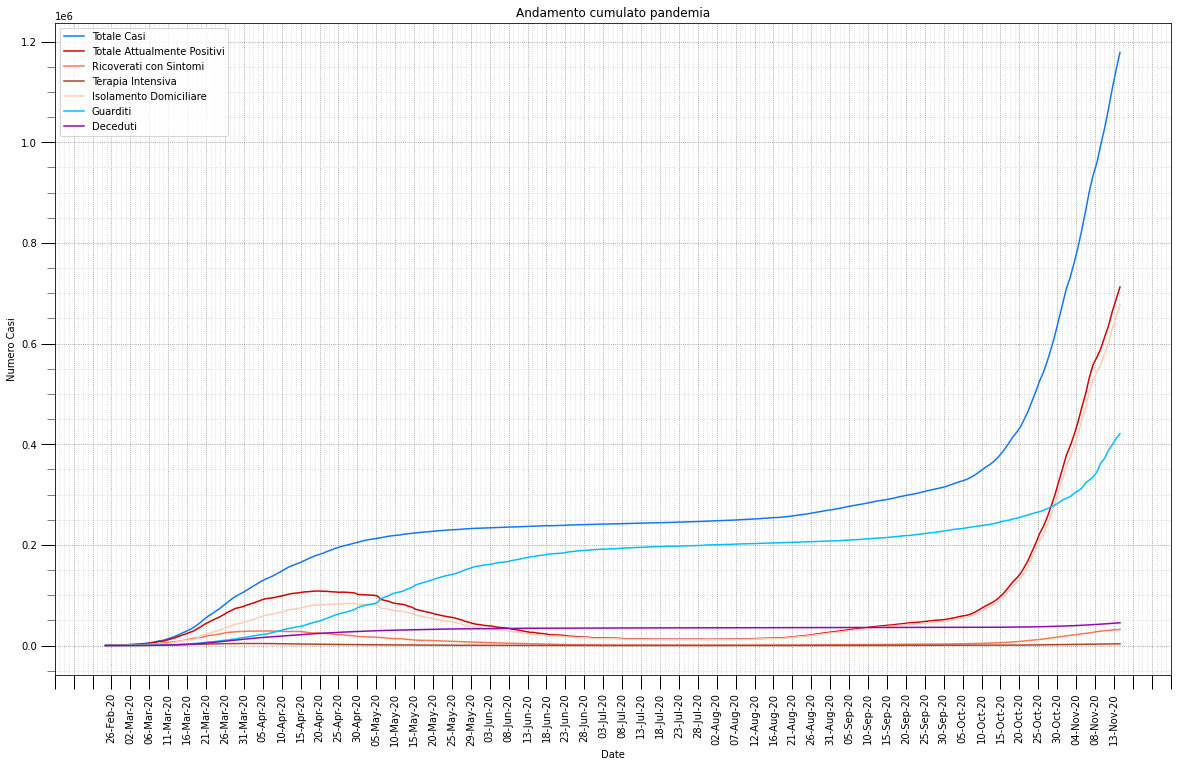

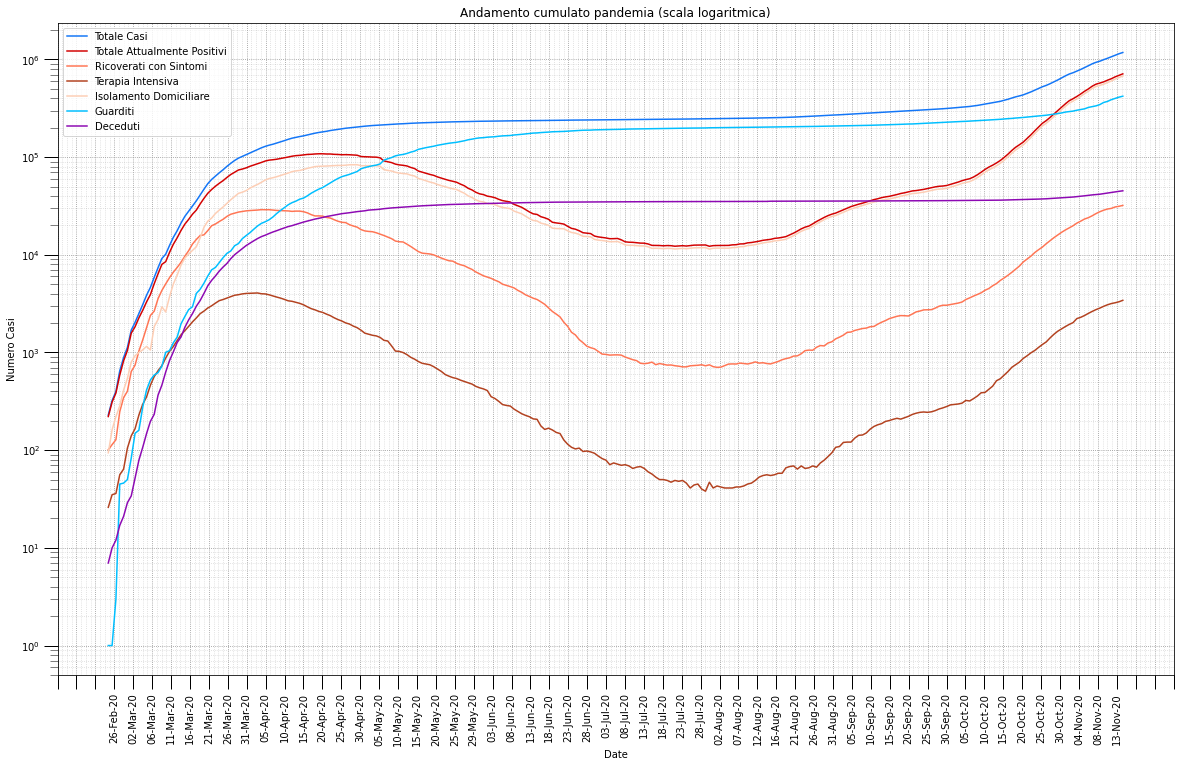

In [22]:
date = national_trend['data'].to_numpy()
totale_casi =national_trend['totale_casi'].to_numpy()
totale_attualmente_positivi =national_trend['totale_attualmente_positivi'].to_numpy()
ricoverati_con_sintomi =national_trend['ricoverati_con_sintomi'].to_numpy()
terapia_intensiva =national_trend['terapia_intensiva'].to_numpy()
isolamento_domiciliare =national_trend['isolamento_domiciliare'].to_numpy()
dimessi_guariti =national_trend['dimessi_guariti'].to_numpy()
deceduti =national_trend['deceduti'].to_numpy()

def plot_national_data():
    colors = COL_TOTALE_CASI
    legends = "Totale Casi"
    ax.plot(date, totale_casi, color=colors,  label=legends)

    colors = COL_ATTUALMENTE_POSITIVI
    legends = "Totale Attualmente Positivi"
    ax.plot(date, totale_attualmente_positivi, color=colors,  label=legends)

    colors = COL_RICOVERATI
    legends = "Ricoverati con Sintomi"
    ax.plot(date, ricoverati_con_sintomi, color=colors,  label=legends)

    colors = COL_TERAPIA_INTENSIVA
    legends = "Terapia Intensiva"
    ax.plot(date, terapia_intensiva, color=colors,  label=legends)

    colors = COL_ISOLAMENTO_DOMICILIARE
    legends = "Isolamento Domiciliare"
    ax.plot(date, isolamento_domiciliare, color=colors,  label=legends)

    colors = COL_GUARITI
    legends = "Guarditi"
    ax.plot(date, dimessi_guariti, color=colors,  label=legends)

    colors = COL_DECEDUTI
    legends = "Deceduti"
    ax.plot(date, deceduti, color=colors,  label=legends)
    beautify_graph(ax)


plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia")

fig, ax = plt.subplots()
plt.yscale('log')

plot_national_data()
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento cumulato pandemia (scala logaritmica)")

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [23]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [24]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
09-Nov-20         2.70          -43.69           2.63     3.05      0.86   
10-Nov-20         3.65           14.14           2.93     5.14      1.39   
11-Nov-20         3.31           38.58           3.94     2.50      1.47   
12-Nov-20         3.69           -6.68           3.54     4.20      1.48   
13-Nov-20         3.84           33.08           4.55     2.96      1.26   
14-Nov-20         3.36          -15.11           3.69     3.05      1.23   
15-Nov-20         2.97           -1.85           3.49     2.28      1.22   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
09-Nov-20         4.44        4.52          3.64           2.53     0.85  
10-Nov-20         3.67        3.61          4.28           2.88     1.24  
11-Nov-20         2.91        2.83          3.70           4.00     1.27  
12-Nov-20         1.59        1.46          2.89           3.65     1.31  
13-Nov-20         3.33        3.48          1.89           4.61     1.40  
14-Nov-20         1.64        1.57          2.35           3.80     1.23  
15-Nov-20         2.20        2.07          3.51           3.56     1.05

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [25]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [26]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
11-Nov-20      1028424   3.31           3.83                 613358   3.94   
12-Nov-20      1066401   3.69           3.74                 635054   3.54   
13-Nov-20      1107303   3.84           3.63                 663926   4.55   
14-Nov-20      1144552   3.36           3.45                 688435   3.69   
15-Nov-20      1178529   2.97           3.36                 712490   3.49   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
11-Nov-20           4.76   372113   2.50           2.77       623   1.47   
12-Nov-20           4.33   387758   4.20           3.14       636   1.48   
13-Nov-20           4.17   399238   2.96           3.08       550   1.26   
14-Nov-20           3.74   411434   3.05           3.25       544   1.23   
15-Nov-20           3.54   420810   2.28           3.31       546   1.22   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
11-Nov-20           1.12   225640   1.27           1.22  
12-Nov-20           1.17   234672   1.31           1.22  
13-Nov-20           1.19   254908   1.40           1.22  
14-Nov-20           1.21   227695   1.23           1.20  
15-Nov-20           1.27   195275   1.05           1.19

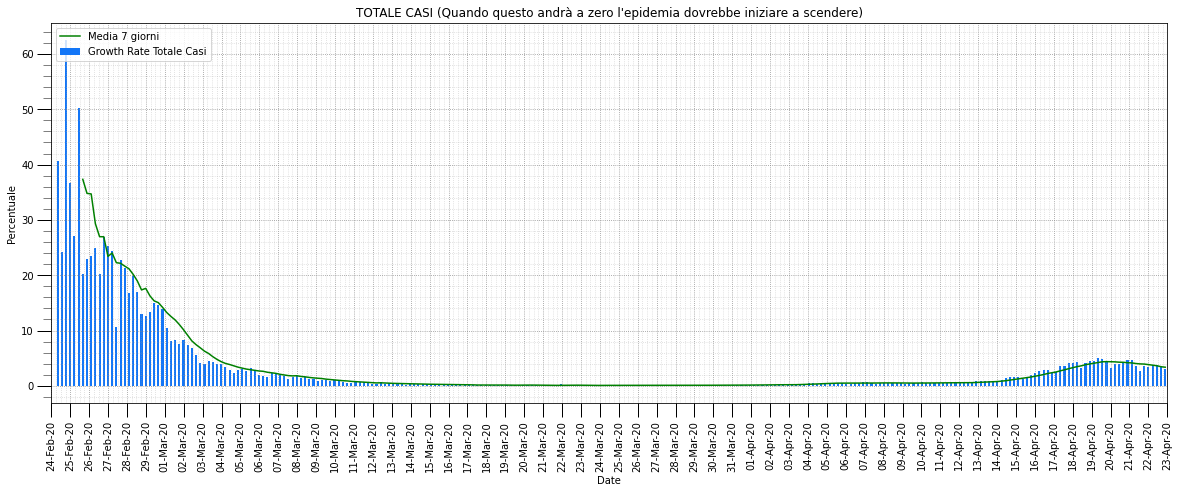

In [27]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

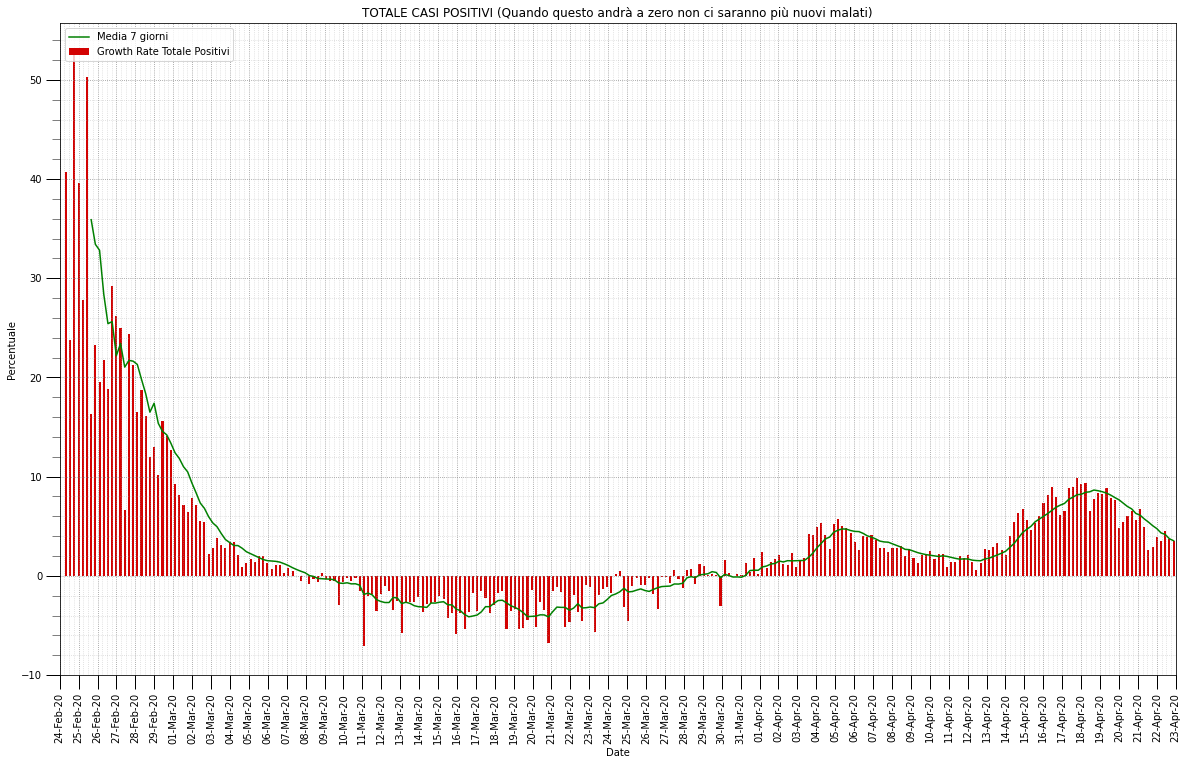

In [28]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


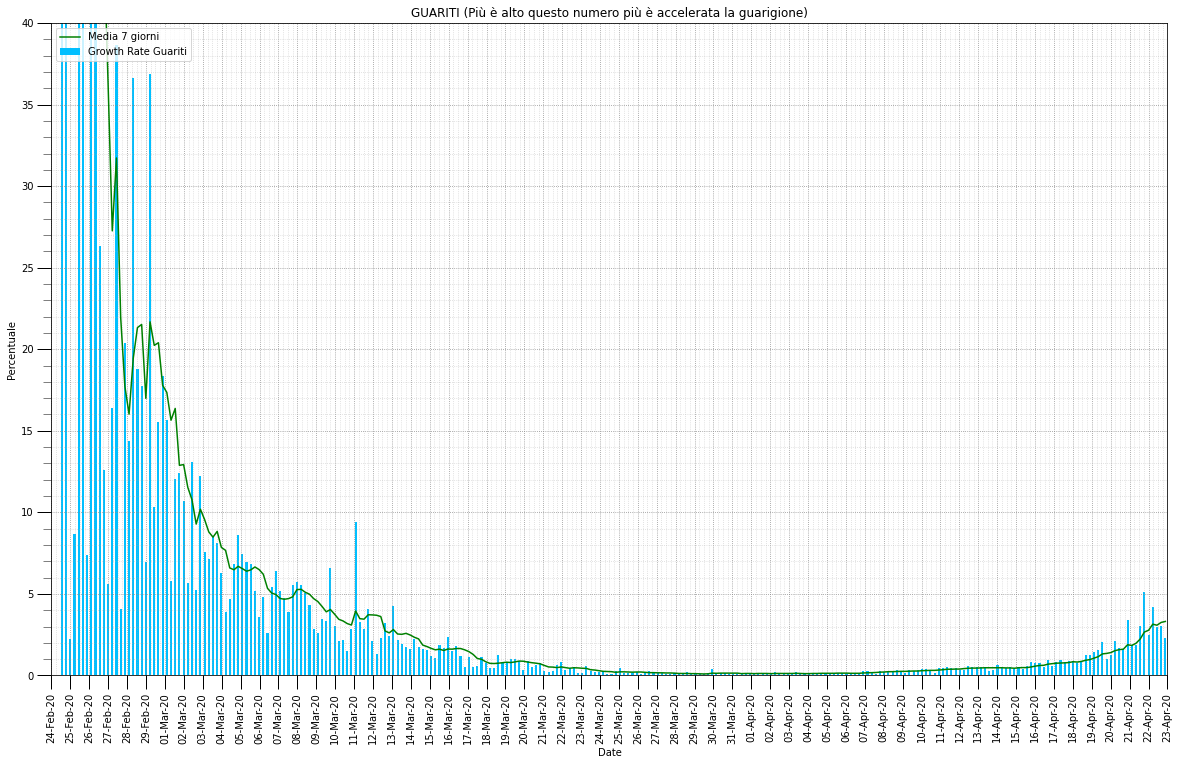

In [29]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

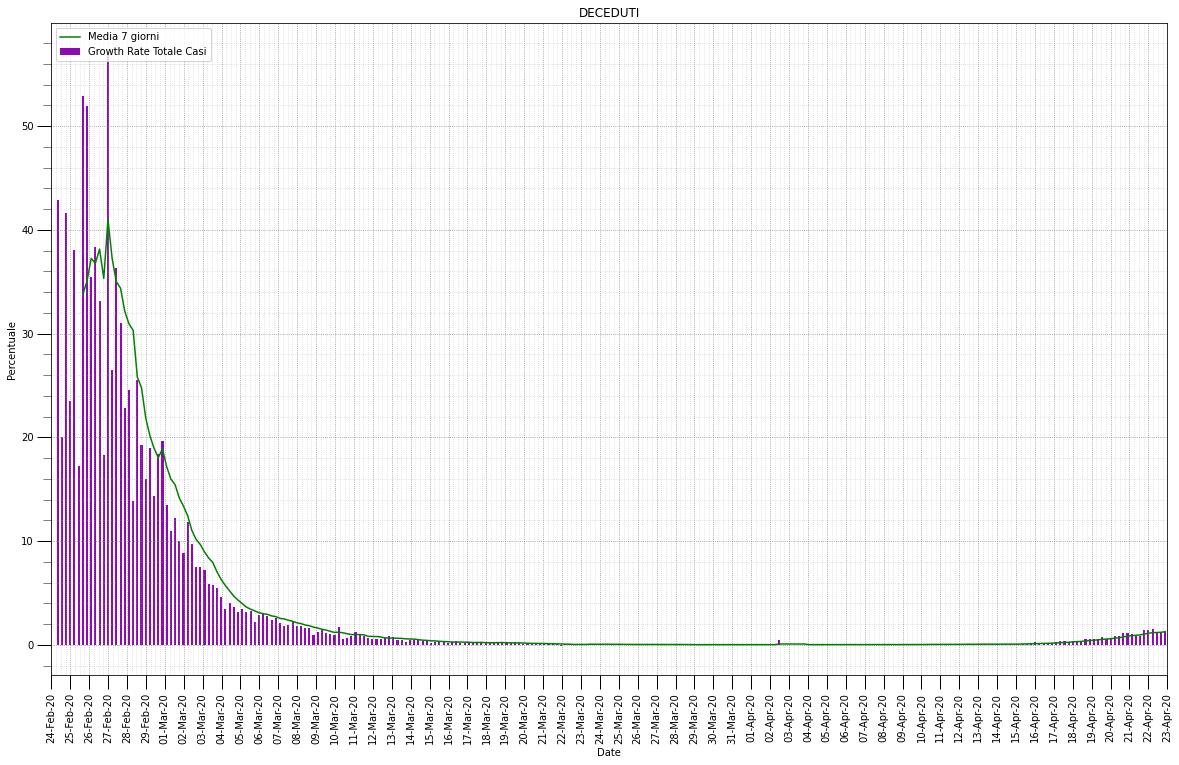

In [30]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [31]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [32]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
09-Nov-20        4.73            0.40                   53.04    40.43   
10-Nov-20        2.84            0.35                   44.62    50.54   
11-Nov-20        2.46            0.33                   67.74    27.58   
12-Nov-20        1.13            0.23                   55.77    41.20   
13-Nov-20        2.55            0.15                   67.90    28.07   
14-Nov-20        1.30            0.20                   64.29    32.74   
15-Nov-20        1.91            0.34                   68.55    27.60   

           DECEDUTI  
                     
09-Nov-20      1.41  
10-Nov-20      1.65  
11-Nov-20      1.89  
12-Nov-20      1.67  
13-Nov-20      1.34  
14-Nov-20      1.46  
15-Nov-20      1.61

### Percentuali totali

In [33]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
06-Nov-20  06-Nov-20                    1.98               0.33   
07-Nov-20  07-Nov-20                    2.77               0.30   
08-Nov-20  08-Nov-20                    4.08               0.35   
09-Nov-20  09-Nov-20                    4.73               0.40   
10-Nov-20  10-Nov-20                    2.84               0.35   
11-Nov-20  11-Nov-20                    2.46               0.33   
12-Nov-20  12-Nov-20                    1.13               0.23   
13-Nov-20  13-Nov-20                    2.55               0.15   
14-Nov-20  14-Nov-20                    1.30               0.20   
15-Nov-20  15-Nov-20                    1.91               0.34   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
06-Nov-20                   68.51            28.00      1.18    -8.05  
07-Nov-20                   80.87            14.99      1.07    24.83  
08-Nov-20                   75.59            18.96      1.01   -21.90  
09-Nov-20                   53.04            40.43      1.41   -43.69  
10-Nov-20                   44.62            50.54      1.65    14.14  
11-Nov-20                   67.74            27.58      1.89    38.58  
12-Nov-20                   55.77            41.20      1.67    -6.68  
13-Nov-20                   67.90            28.07      1.34    33.08  
14-Nov-20                   64.29            32.74      1.46   -15.11  
15-Nov-20                   68.55            27.60      1.61    -1.85

**Le percentuali dall'inizio dell'epidemia**

In [34]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [35]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
09-Nov-20        2.88            0.30                   56.52    35.95   
10-Nov-20        2.88            0.30                   56.11    36.47   
11-Nov-20        2.86            0.30                   56.48    36.18   
12-Nov-20        2.80            0.30                   56.45    36.36   
13-Nov-20        2.79            0.29                   56.88    36.05   
14-Nov-20        2.74            0.29                   57.12    35.95   
15-Nov-20        2.72            0.29                   57.45    35.71   

           DECEDUTI  
                     
09-Nov-20      4.35  
10-Nov-20      4.25  
11-Nov-20      4.18  
12-Nov-20      4.09  
13-Nov-20      3.99  
14-Nov-20      3.90  
15-Nov-20      3.84

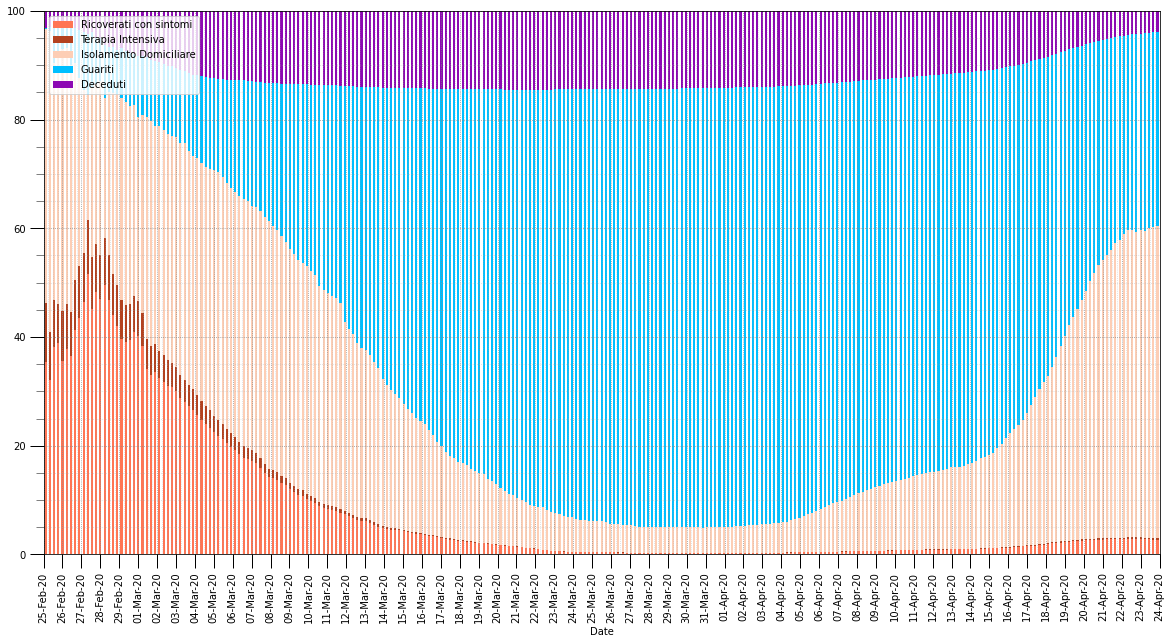

In [36]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [37]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [38]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [39]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [40]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [41]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
15-Nov-20    19182        4979     10093    111187           88520   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
15-Nov-20                  18937  84274    43377     320780   23316

In [42]:
regional_datas['totale_casi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
15-Nov-20    2995         17302        12568    125465   34438     15183   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
15-Nov-20    41532    79403   18876           5246  100876

### Nuovi Casi Per Regione

In [43]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [44]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
09-Nov-20      624         132       443      3120            2024   
10-Nov-20      745         224       409      2716            2423   
11-Nov-20      662         168       376      3166            2428   
12-Nov-20      541         202       426      4065            2401   
13-Nov-20      683         307       297      4079            2384   
14-Nov-20      939         265       333      3351            2631   
15-Nov-20      469         158       344      3771            2821   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
09-Nov-20                    320   2153      538       4777     262  
10-Nov-20                    482   2608     1172      10955     504  
11-Nov-20                    572   2479     1102       8180     701  
12-Nov-20                    838   2686     1013       9291     834  
13-Nov-20                    831   2925     1209      10634     740  
14-Nov-20                    558   2997     1091       8129     779  
15-Nov-20                    608   2612      822       8060     707

In [45]:

incremental_data_regional.iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
09-Nov-20      98           583          257      2876     730       327   
10-Nov-20      42           375          243      3659    1245       489   
11-Nov-20      71           386          253      2953    1332       416   
12-Nov-20      73           694          253      4787    1434       301   
13-Nov-20      63           820          202      5258    1350       623   
14-Nov-20     121           690          206      4471    1741       396   
15-Nov-20      85           628          268      3682     905       370   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
09-Nov-20     1023     2244     314            201    2223  
10-Nov-20     1201     2223     485            127    2763  
11-Nov-20     1487     2507     515            125    3082  
12-Nov-20     1692     1932     783            167    3564  
13-Nov-20     1707     2478     604            103    3605  
14-Nov-20     1729     2420     579            245    3578  
15-Nov-20     1422     2653     657            143    2792

### Totale Attualmente Positivi per Regione

In [46]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
15-Nov-20    13034        3969      7039     88257           53201   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
15-Nov-20                   9927  67309    15738     162541   14049

In [47]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
15-Nov-20    2012         10290         2962     71229   24702     10220   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
15-Nov-20    28807    52308   11095           2295   61506

### Nuovi Positivi per Regione

In [48]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
09-Nov-20      541         123       425      2668            1778   
10-Nov-20      556         210       402      1908            2150   
11-Nov-20      522         161       290      2442            2111   
12-Nov-20      466         192       423      3389            2133   
13-Nov-20      492         260       117      3161            2132   
14-Nov-20      714         233       309      2026            2406   
15-Nov-20      412         136        53      3011            2639   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
09-Nov-20                    191   1896      313       -951     210  
10-Nov-20                      9   2315      615       4046     438  
11-Nov-20                    324   1994      619       6413     625  
12-Nov-20                    482   2336      706        875     698  
13-Nov-20                    504   2480      224       8476     622  
14-Nov-20                    378   2559      449       5010     585  
15-Nov-20                    398   2351      404       6262     630

In [49]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
09-Nov-20      18           427          221      2059     626       166   
10-Nov-20      32           249         -165      2579    1073       367   
11-Nov-20      64           222          -22      1519    1213       221   
12-Nov-20      68           350           46      2844    1156       190   
13-Nov-20      55           479           87      3456    1256       322   
14-Nov-20      51           345          -86      2561    1489       289   
15-Nov-20      82           231          128      2014     702       238   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
09-Nov-20      472     1033     196             94    2192  
10-Nov-20      893     1834     144             33   -2912  
11-Nov-20      732     1586     194             33    1985  
12-Nov-20     1350     1016     450              6    2520  
13-Nov-20     1372     1213    -394             25    2533  
14-Nov-20     1520      932     386            -64    2417  
15-Nov-20     1001     1247     319             -4    1801

### Terapia intensiva

In [50]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  Calabria  Campania  Emilia-Romagna  \
data                                                                 
09-Nov-20       48          18        16       191             204   
10-Nov-20       46          18        19       193             215   
11-Nov-20       51          19        18       181             222   
12-Nov-20       52          19        21       192             228   
13-Nov-20       57          23        27       183             225   
14-Nov-20       59          21        26       184             231   
15-Nov-20       59          26        41       194             246   

           Friuli Venezia Giulia  Lazio  Liguria  Lombardia  Marche  
data                                                                 
09-Nov-20                     46    237       92        670      71  
10-Nov-20                     47    257       92        708      75  
11-Nov-20                     46    255       98        764      74  
12-Nov-20                     47    259      109        782      74  
13-Nov-20                     47    260      110        801      74  
14-Nov-20                     45    273      108        817      74  
15-Nov-20                     43    274      115        837      77

In [51]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Molise  P.A. Bolzano  P.A. Trento  Piemonte  Puglia  Sardegna  \
data                                                                       
09-Nov-20       7            41           24       312     119        58   
10-Nov-20       7            37           28       325     131        51   
11-Nov-20       8            37           31       340     142        54   
12-Nov-20       7            42           30       348     145        56   
13-Nov-20       7            41           30       353     158        57   
14-Nov-20       6            44           31       360     178        59   
15-Nov-20       7            43           33       372     180        60   

           Sicilia  Toscana  Umbria  Valle d'Aosta  Veneto  
data                                                        
09-Nov-20      187      234      64             15     195  
10-Nov-20      195      242      66             15     204  
11-Nov-20      202      246      68             17     208  
12-Nov-20      205      256      69             16     213  
13-Nov-20      210      265      68             15     219  
14-Nov-20      215      266      68             13     228  
15-Nov-20      217      274      71             12     241

## Andamento per regione

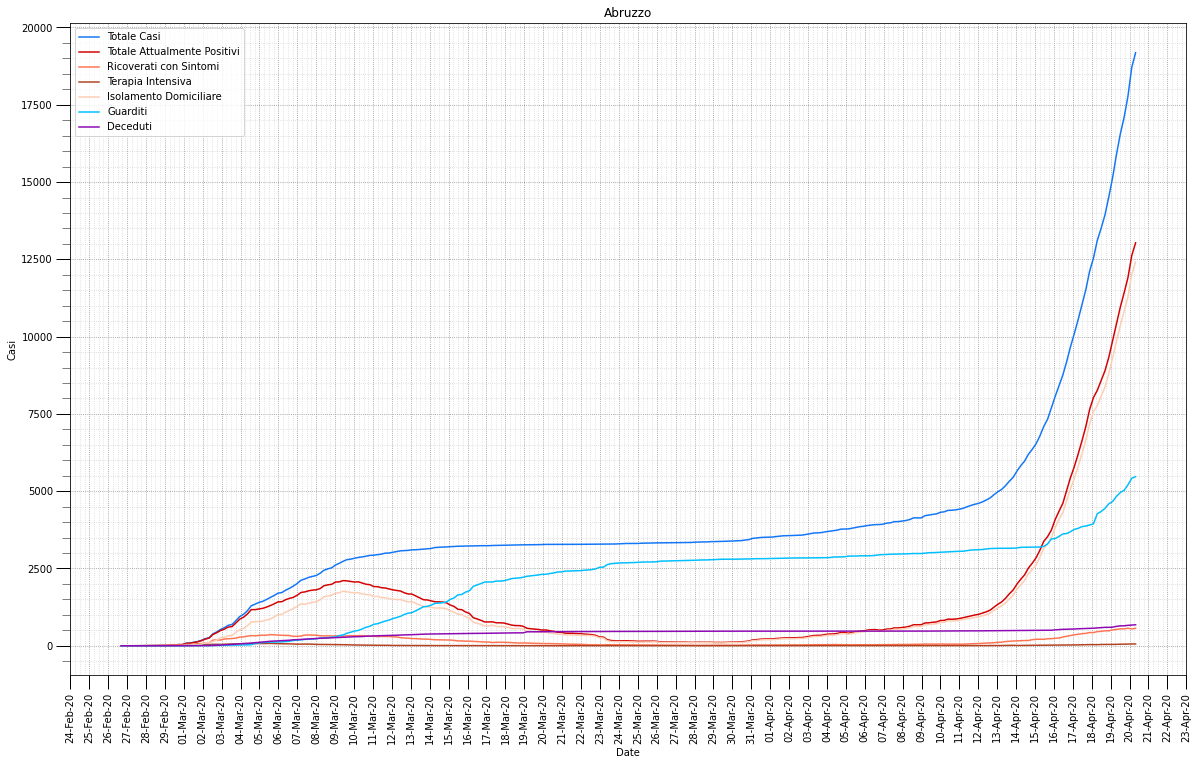

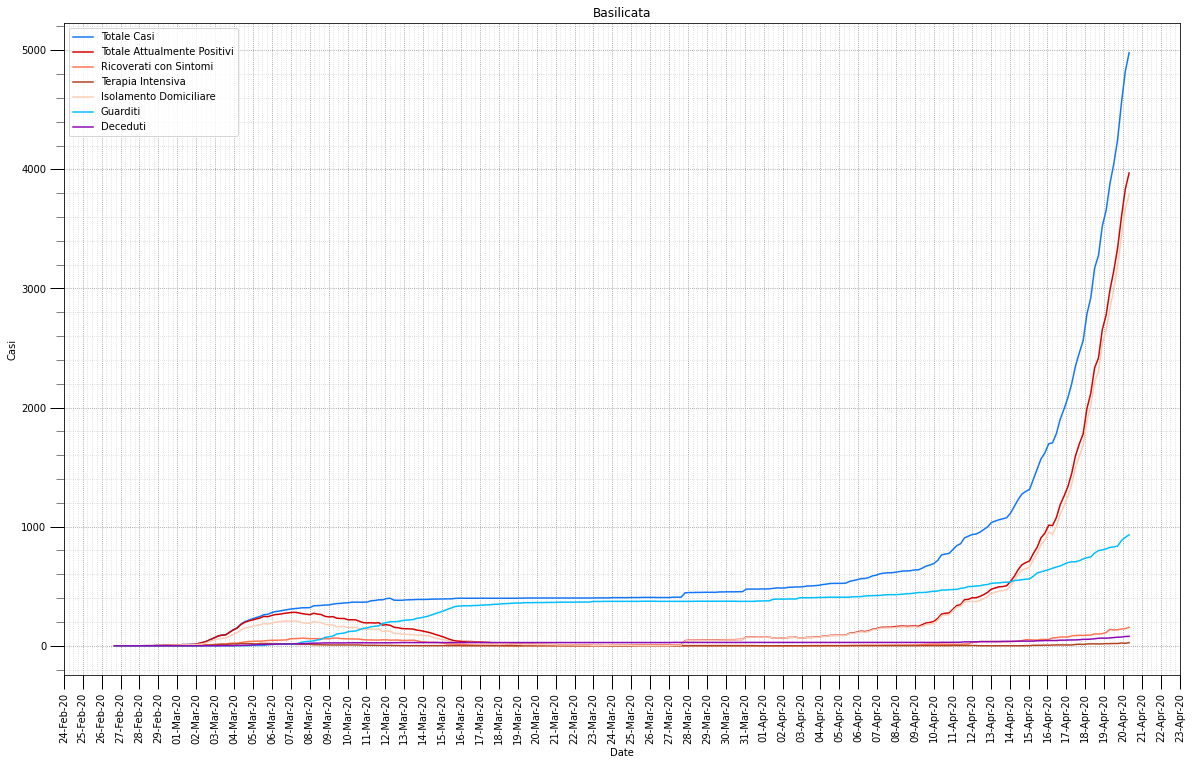

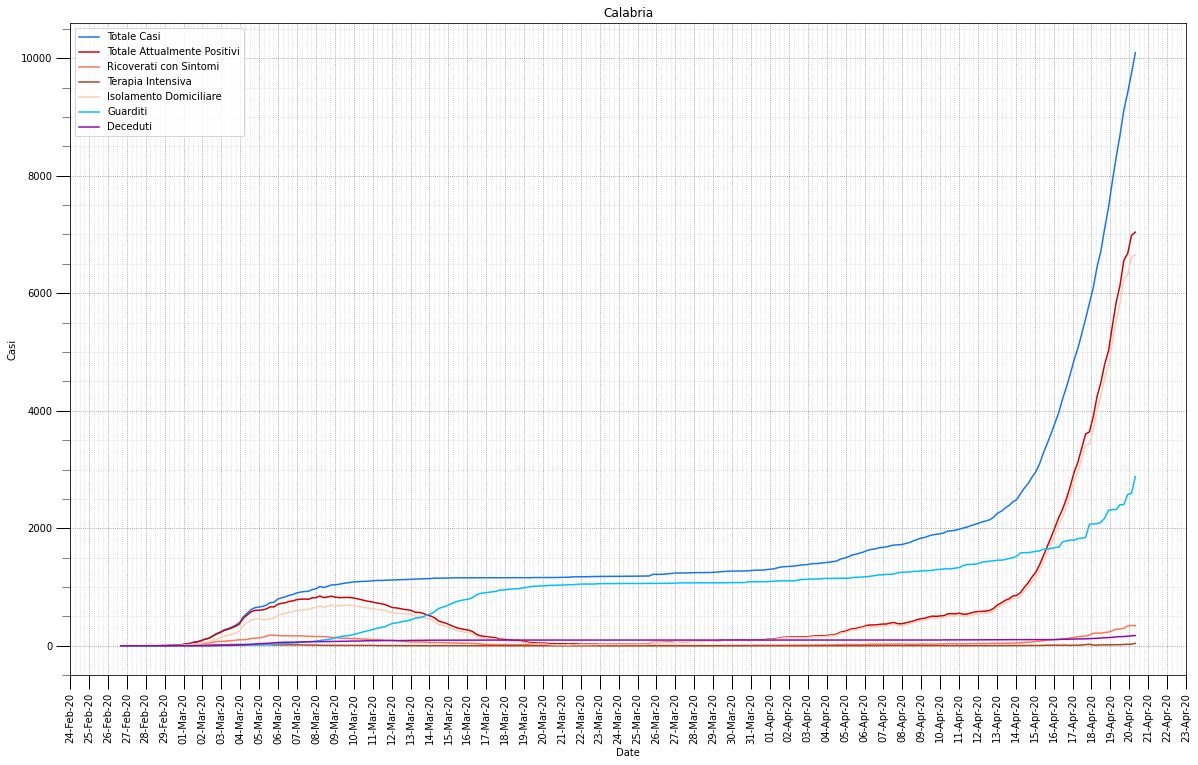

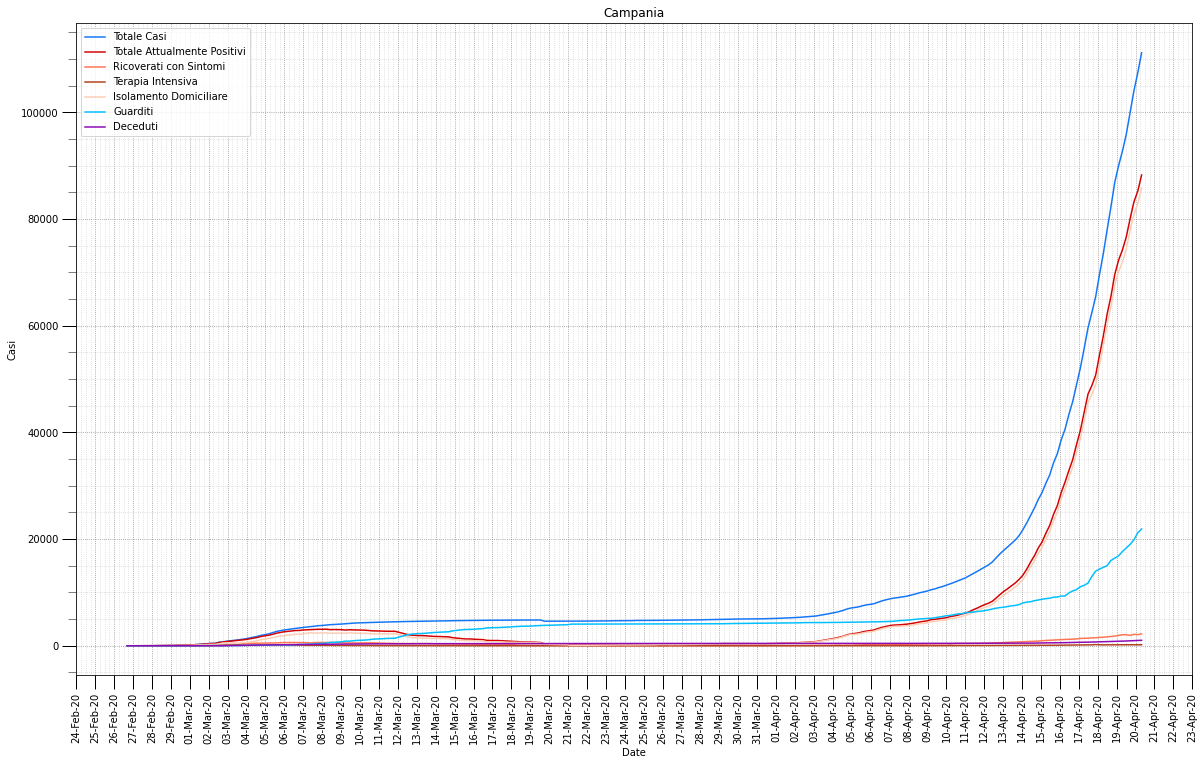

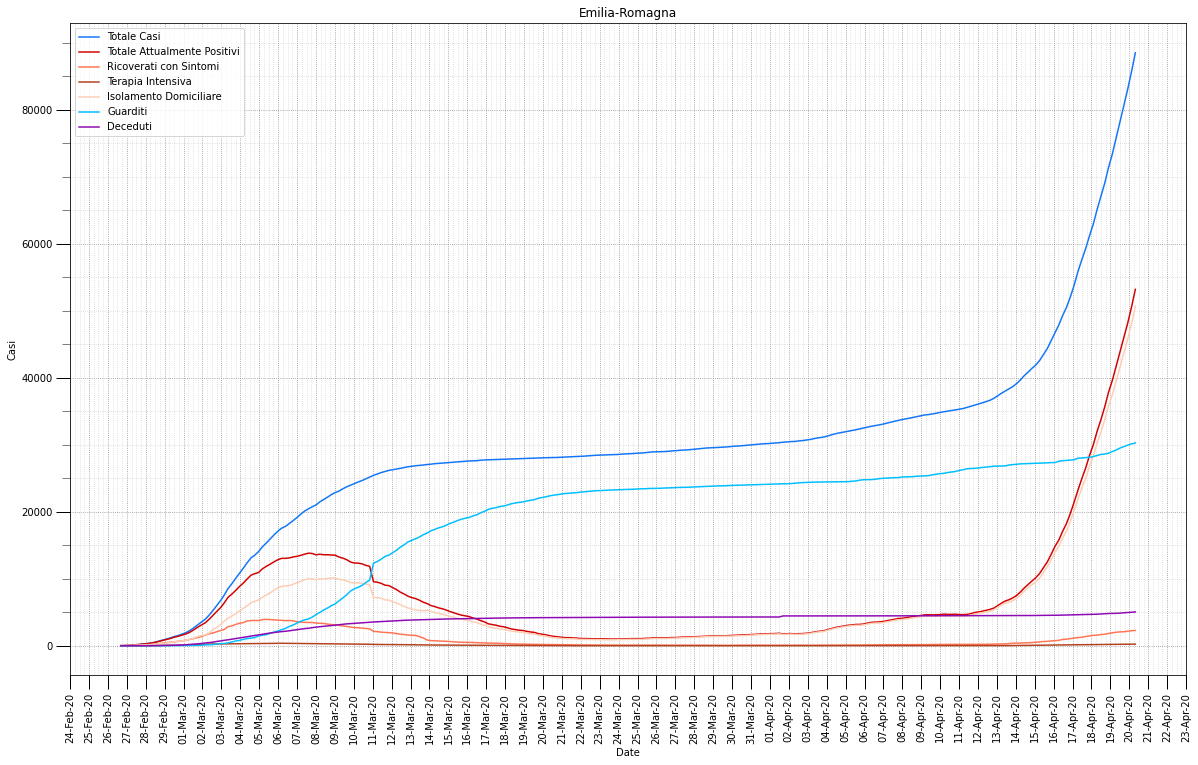

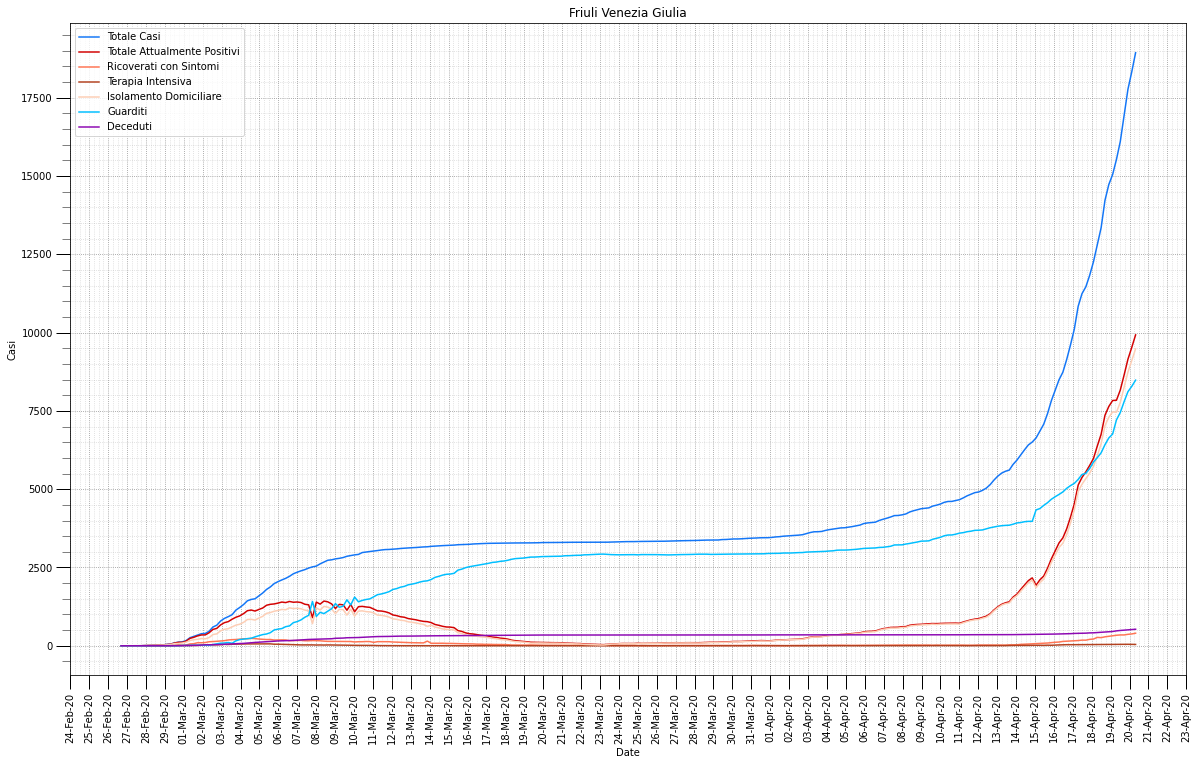

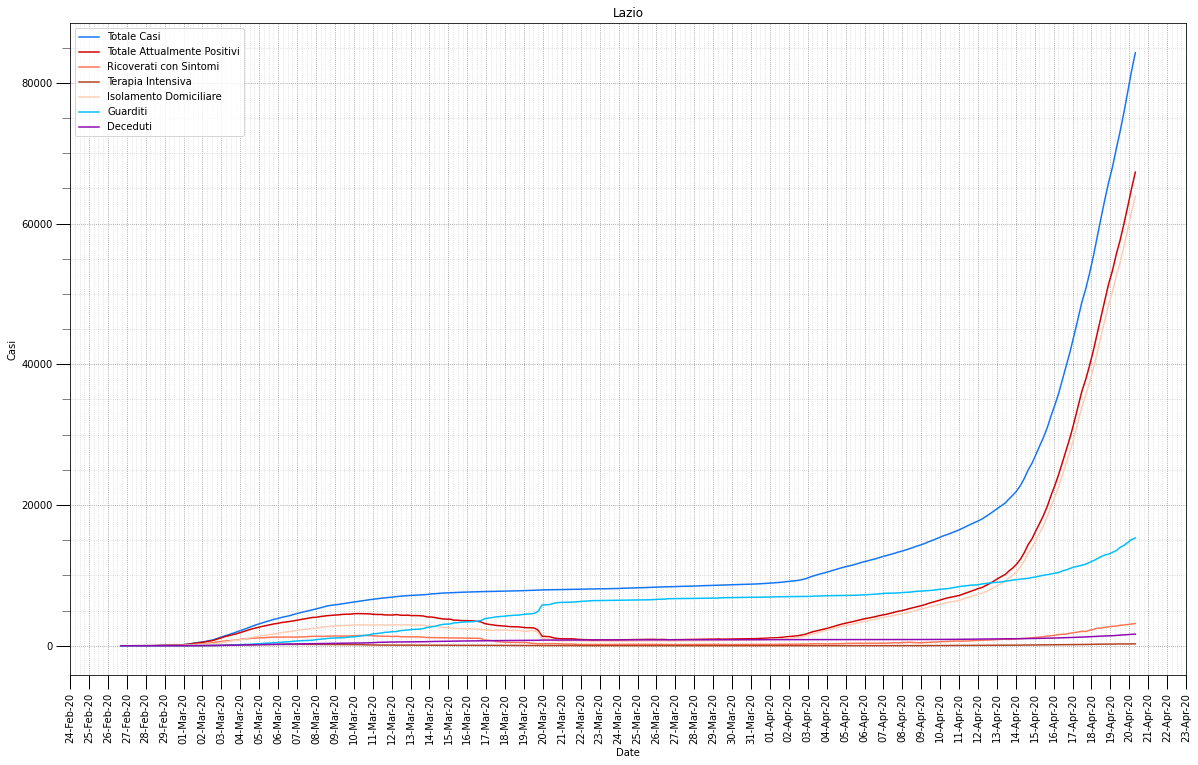

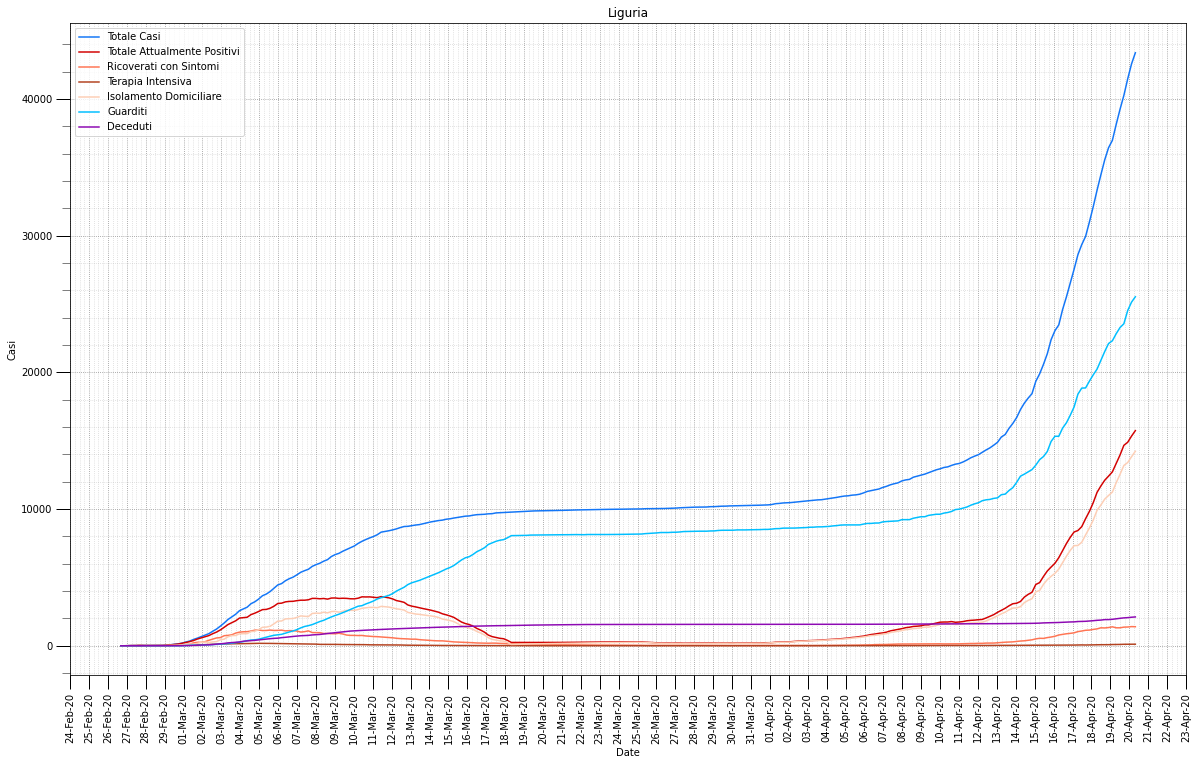

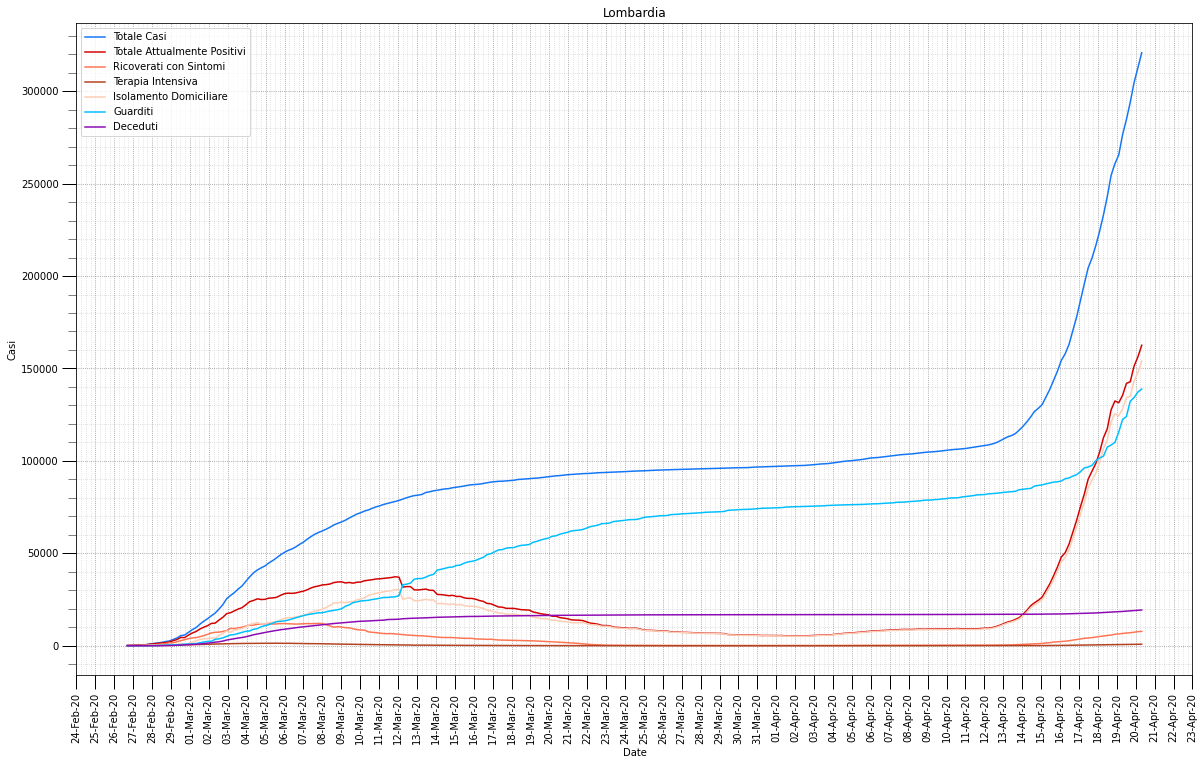

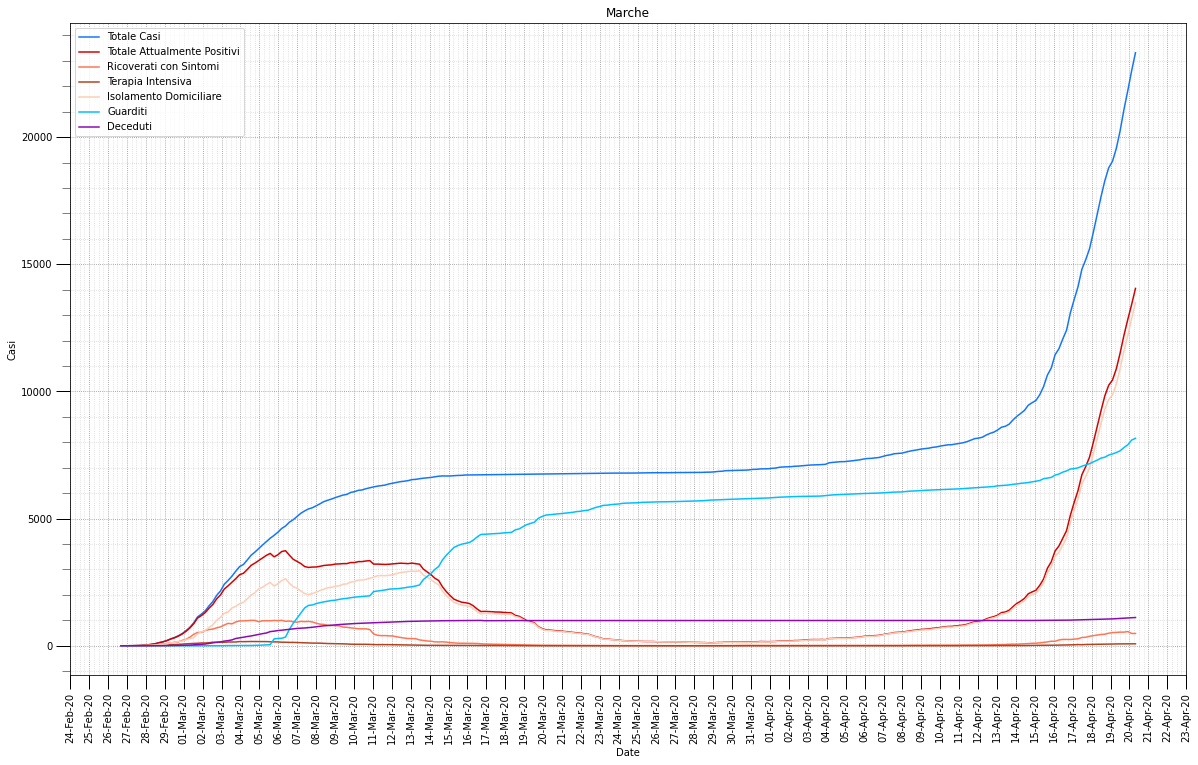

In [52]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

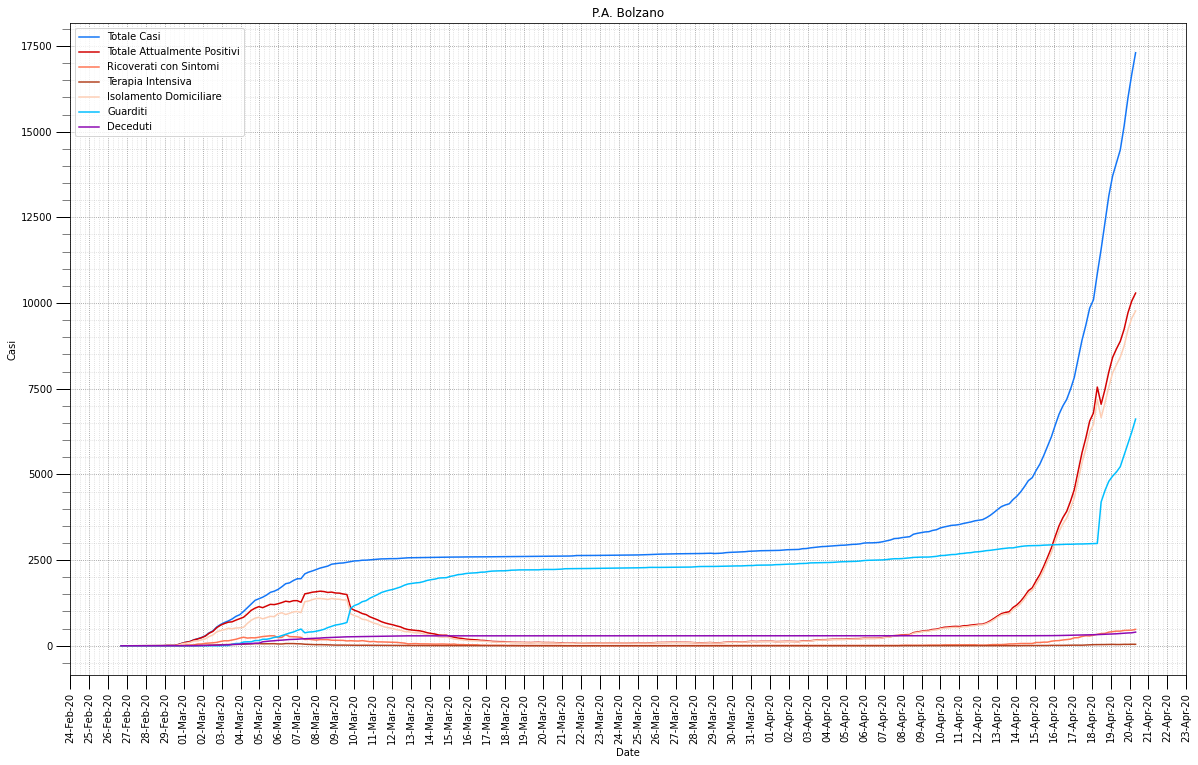

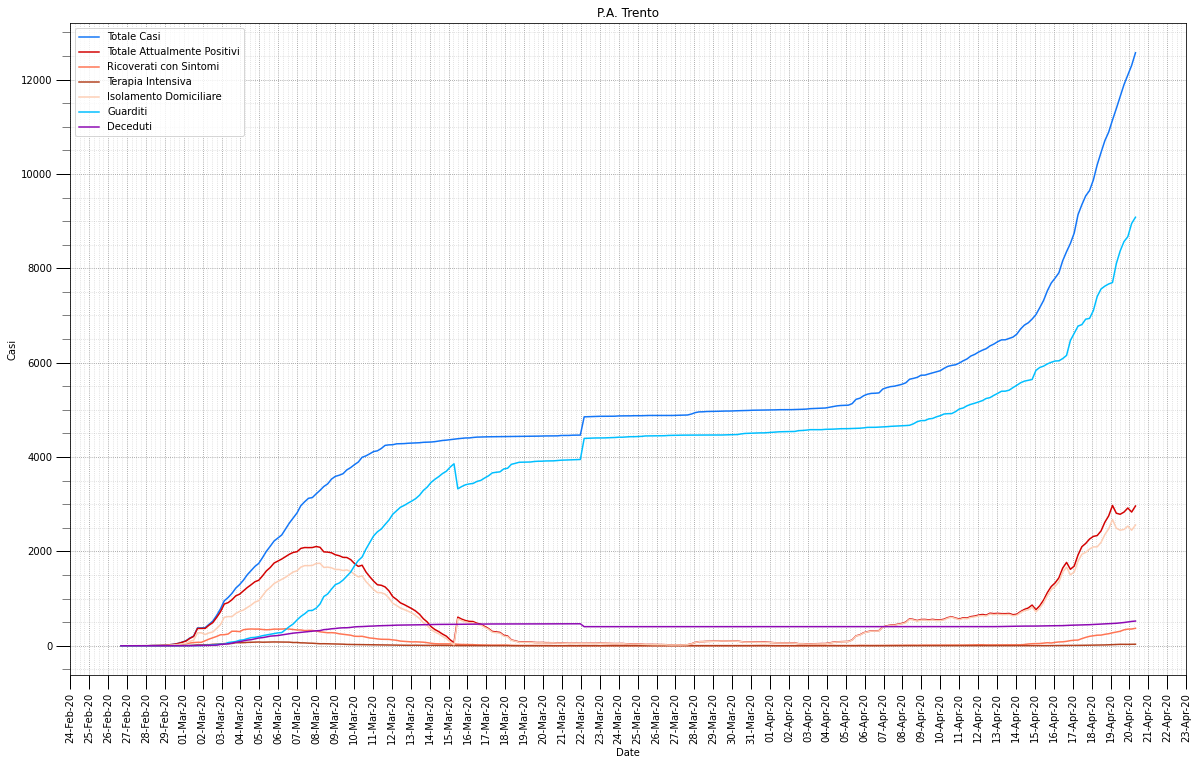

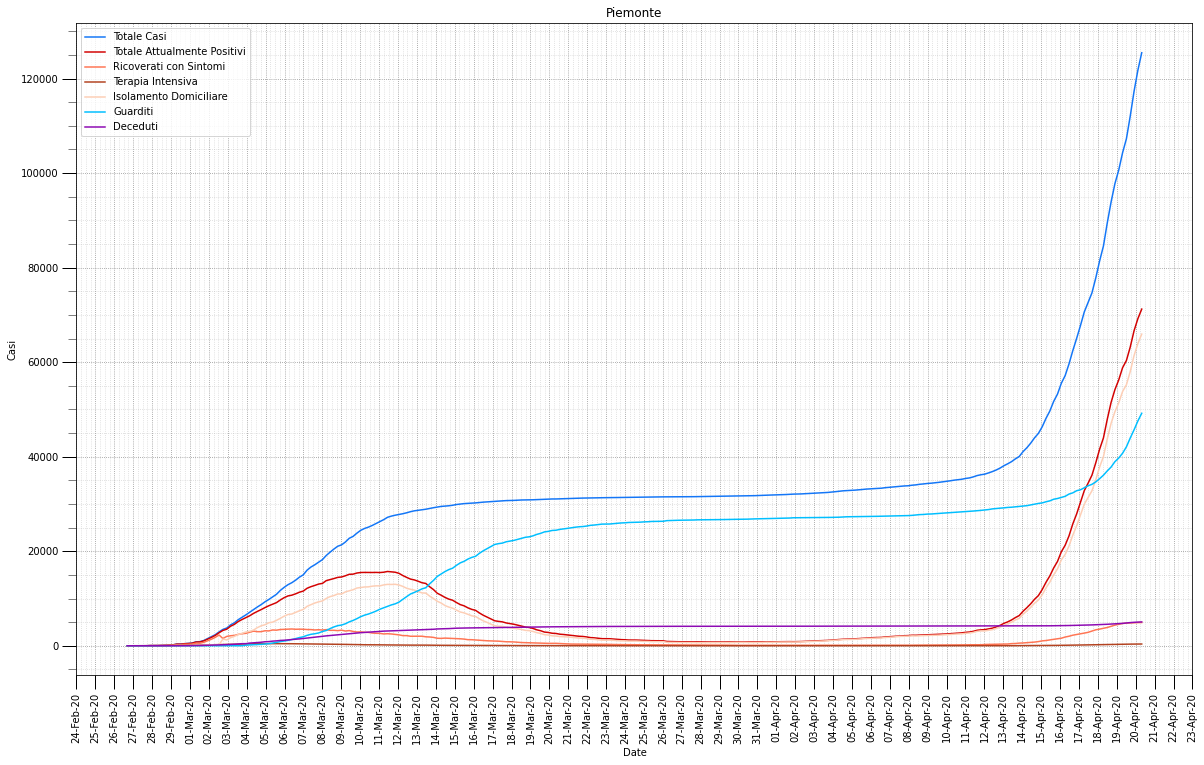

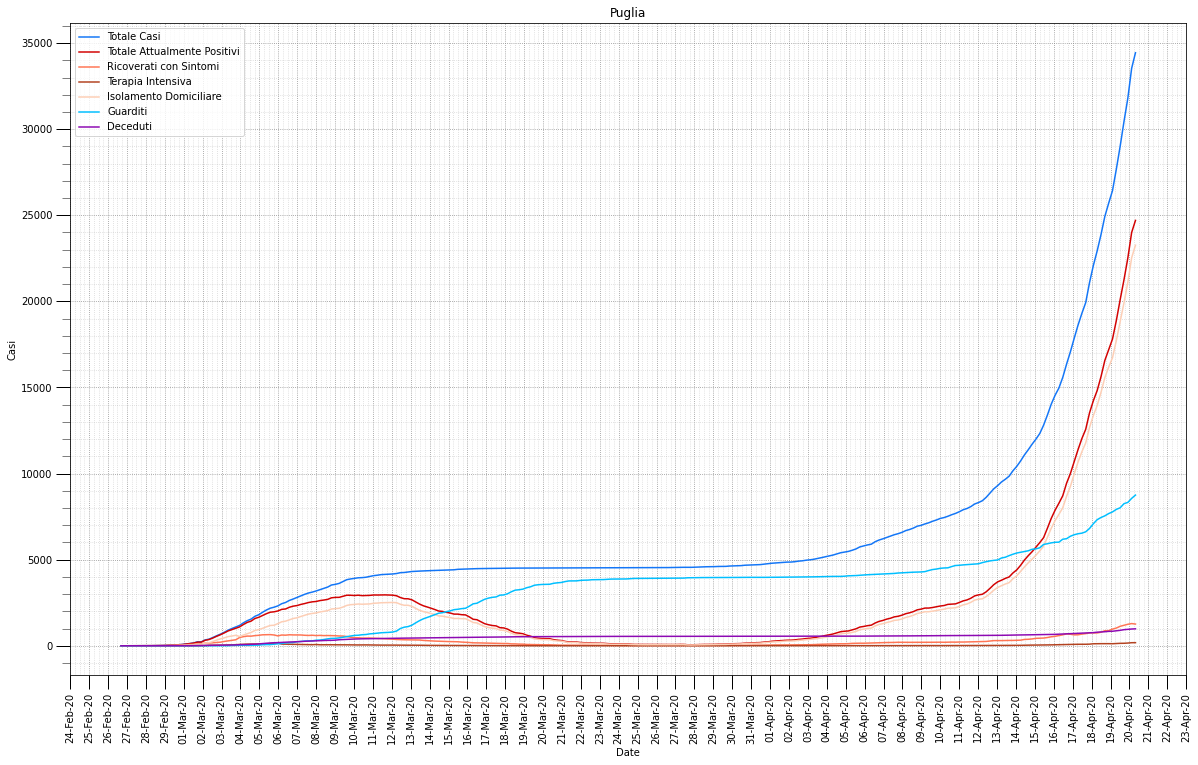

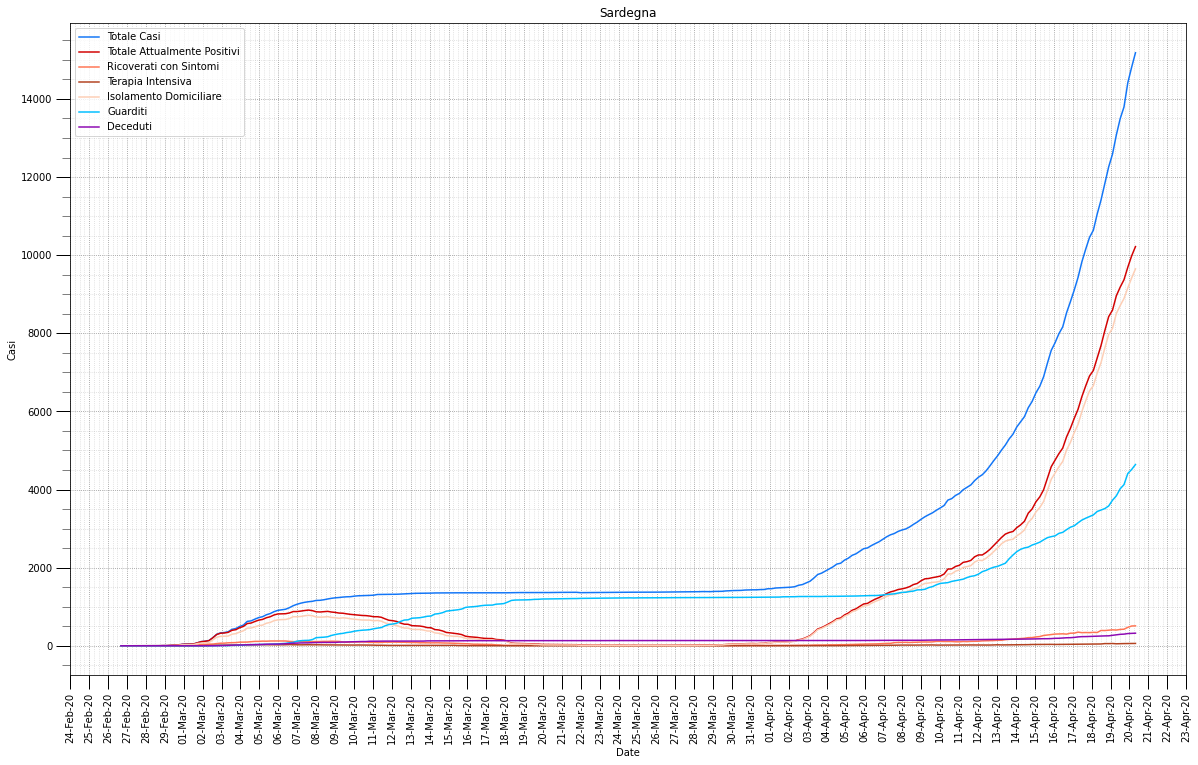

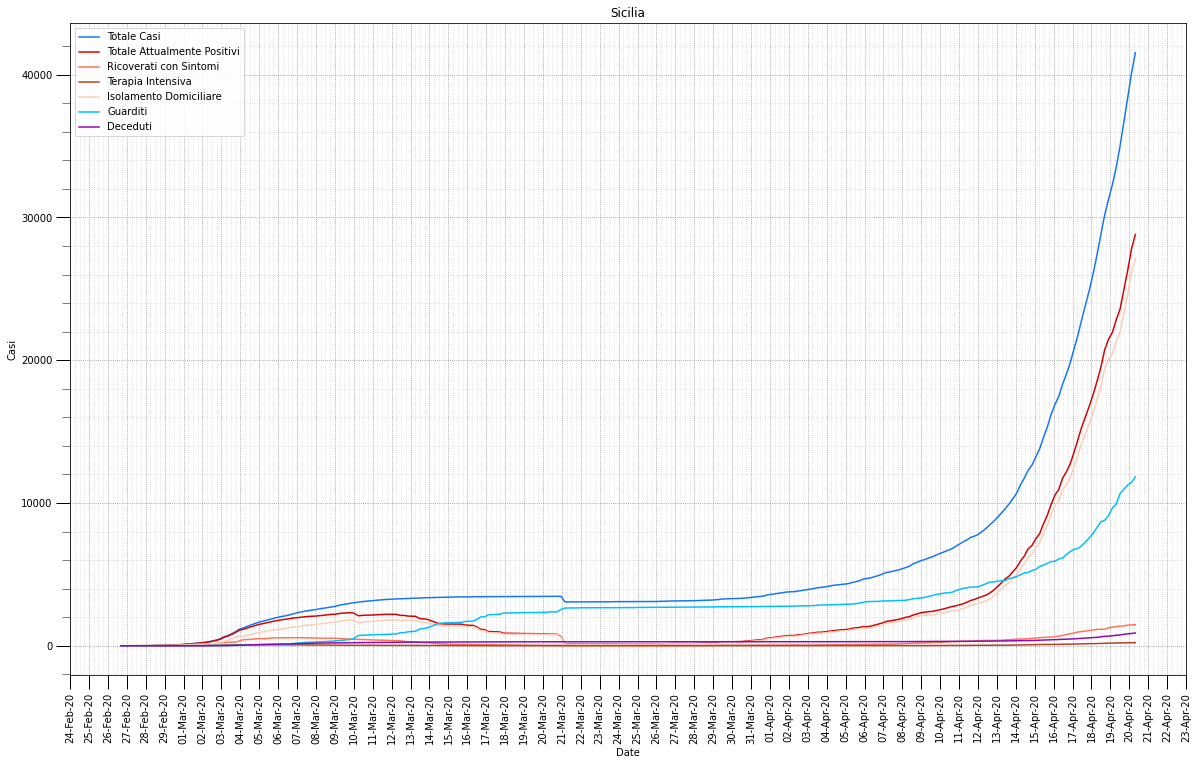

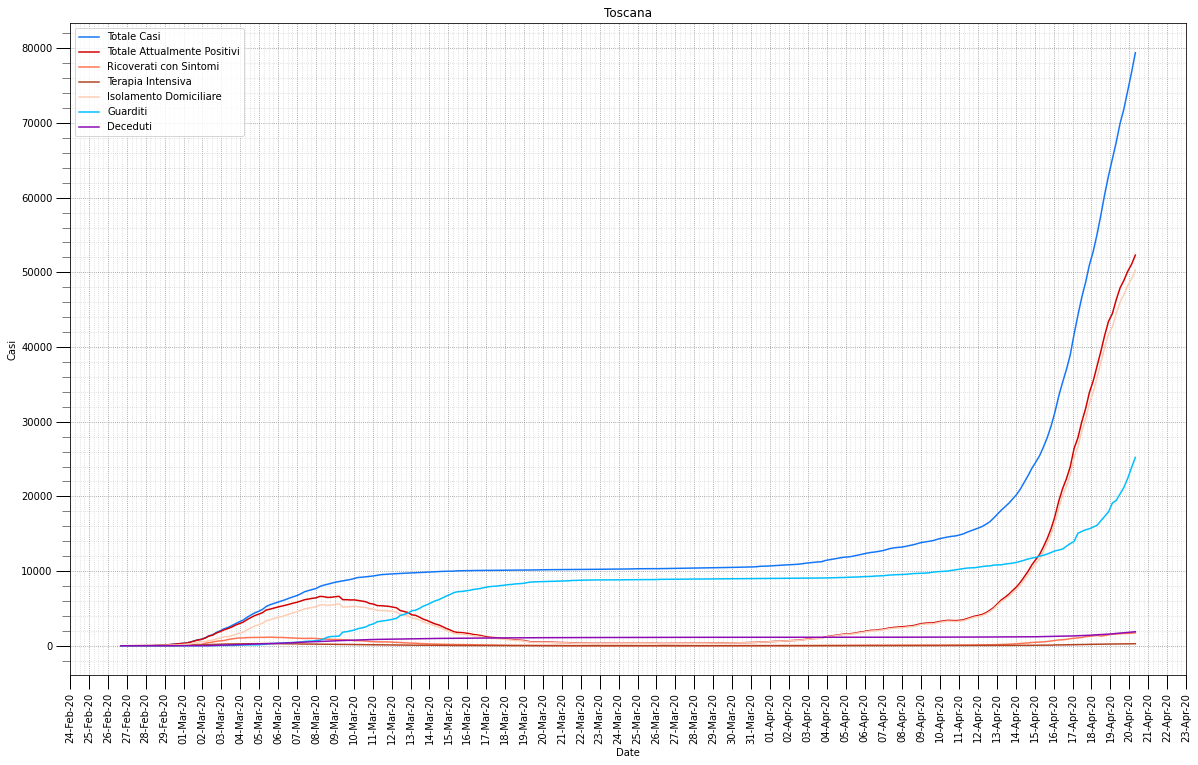

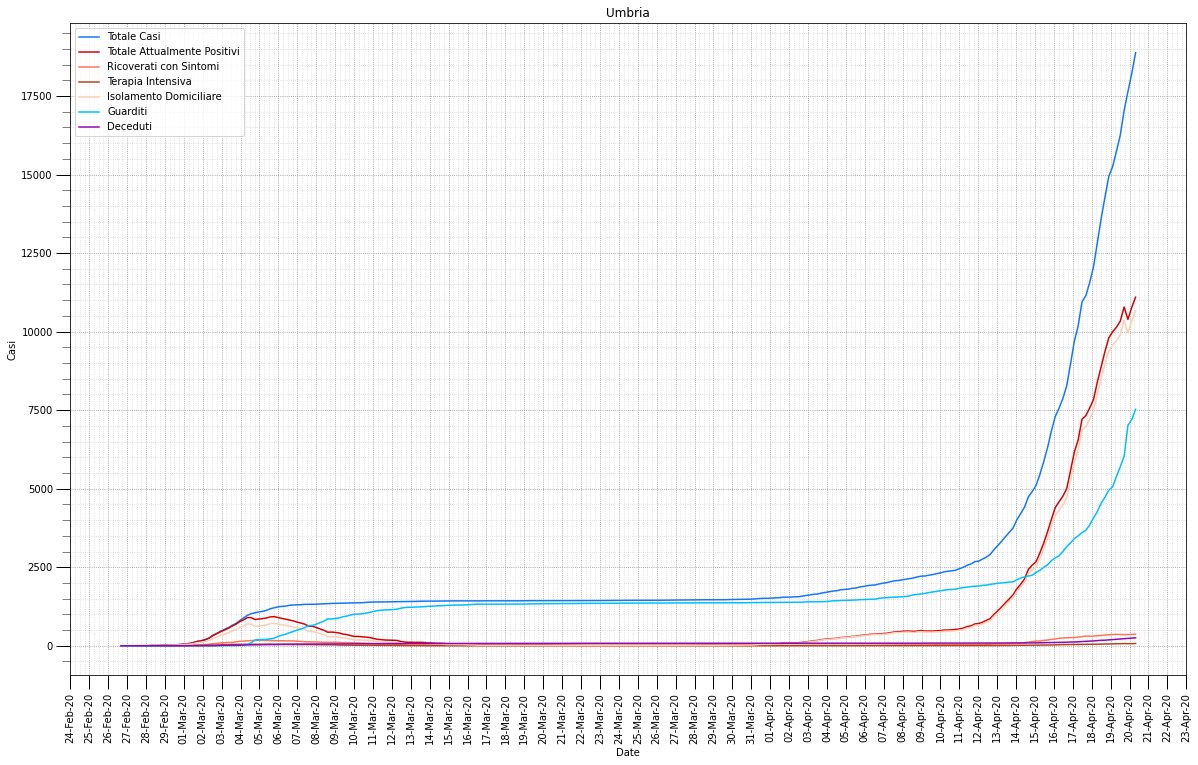

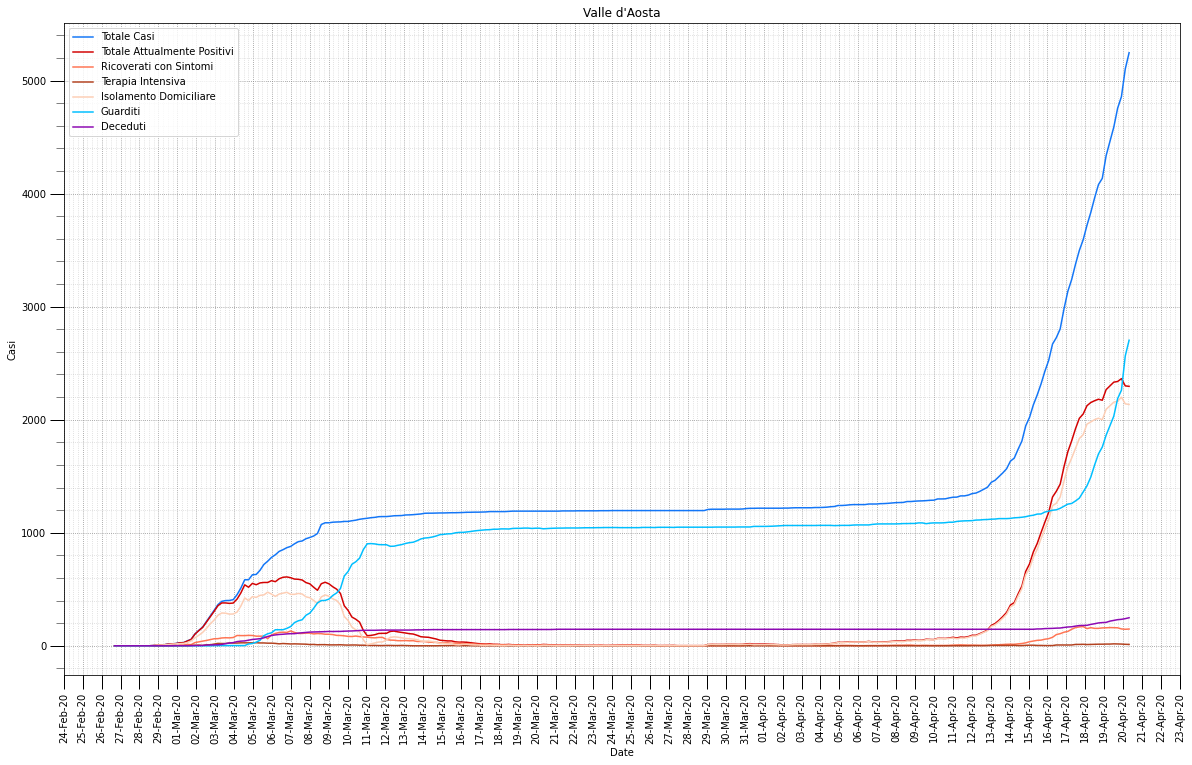

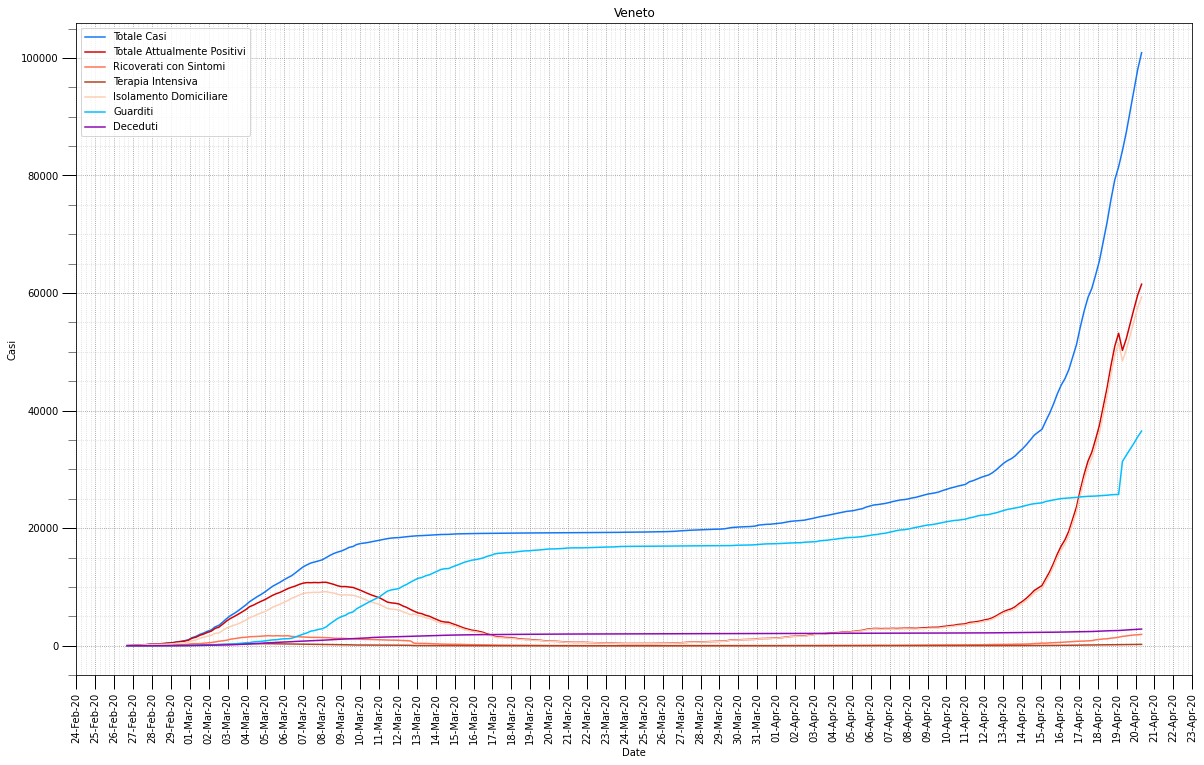

In [53]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)